In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/education-in-india/2015_16_Districtwise.csv
/kaggle/input/education-in-india/2015_16_Districtwise_Metadata.csv
/kaggle/input/education-in-india/2015_16_Statewise_Secondary.csv
/kaggle/input/education-in-india/2015_16_Statewise_Secondary_Metadata.csv
/kaggle/input/education-in-india/2015_16_Statewise_Elementary_Metadata.csv
/kaggle/input/education-in-india/2015_16_Statewise_Elementary.csv


In [2]:
import pandas as pd
import numpy as np


dist = pd.read_csv("/kaggle/input/education-in-india/2015_16_Districtwise.csv")
state_ele = pd.read_csv("/kaggle/input/education-in-india/2015_16_Statewise_Elementary.csv")
state_sec = pd.read_csv("/kaggle/input/education-in-india/2015_16_Statewise_Secondary.csv")




In [3]:
dist.head(10)

,AC_YEAR,STATCD,DISTCD,STATNAME,DISTNAME,DISTRICTS,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,...,UUNI_ALL,UUNI_SC,UUNI_ST,TOTCLS1G,TOTCLS2G,TOTCLS3G,TOTCLS4G,TOTCLS5G,TOTCLS6G,TOTCLS7G
0,2015-16,1,101,JAMMU & KASHMIR,KUPWARA,1,13,391,104,875564.0,...,21322,26,2594,3489,5315,27,62,23,852,239
1,2015-16,1,102,JAMMU & KASHMIR,BARAMULA,1,18,678,144,1015503.0,...,17307,0,1571,4127,5800,210,53,30,1665,360
2,2015-16,1,103,JAMMU & KASHMIR,SRINAGAR,1,8,94,65,1269751.0,...,5444,31,408,817,3284,886,11,0,2873,40
3,2015-16,1,104,JAMMU & KASHMIR,BADGAM,1,13,523,104,735753.0,...,12469,18,857,2290,3837,119,45,8,1035,325
4,2015-16,1,105,JAMMU & KASHMIR,PULWAMA,1,8,359,64,570060.0,...,7408,17,855,1688,2584,151,67,5,1101,209
5,2015-16,1,106,JAMMU & KASHMIR,ANANTNAG,1,12,523,96,1070144.0,...,17771,22,3498,2650,5862,152,60,22,1592,185
6,2015-16,1,107,JAMMU & KASHMIR,LEH (LADAKH),1,6,110,49,147104.0,...,1244,0,889,604,1059,45,9,17,473,0
7,2015-16,1,108,JAMMU & KASHMIR,KARGIL,1,7,134,54,143388.0,...,59,0,59,716,1469,69,26,3,220,99
8,2015-16,1,109,JAMMU & KASHMIR,DODA,1,10,388,80,409576.0,...,14641,2474,2272,2073,2354,165,17,36,766,36
9,2015-16,1,110,JAMMU & KASHMIR,UDHAMPUR,1,11,361,86,555357.0,...,18428,6844,2522,2256,3080,520,13,22,1151,6


In [4]:
state_ele.head(10)

,AC_YEAR,STATCD,STATNAME,DISTRICTS,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,P_URB_POP,POPULATION_0_6,...,USCR35,NOTCH_ASS,TCHINV,TOTCLS1G,TOTCLS2G,TOTCLS3G,TOTCLS4G,TOTCLS5G,TOTCLS6G,TOTCLS7G
0,2015-16,1,JAMMU & KASHMIR,22,201,7263,1628,12549,20.05,16.01,...,1014,20491,1946,41171,62474,7878,564,495,24326,2001
1,2015-16,2,HIMACHAL PRADESH,12,124,10120,2243,6857,8.69,11.14,...,652,36054,3053,38307,6930,6909,6498,5445,6151,2717
2,2015-16,3,PUNJAB,22,146,13197,1780,27704,29.82,10.62,...,2754,88618,14200,56222,23531,42532,9244,8406,30835,7218
3,2015-16,4,CHANDIGARH,1,20,84,20,1055,97.25,11.18,...,117,1994,218,135,419,2066,0,36,1398,0
4,2015-16,5,UTTARAKHAND,13,95,11989,995,10117,21.54,13.14,...,1147,12608,1024,48215,14587,7545,12388,6671,1855,3227
5,2015-16,6,HARYANA,21,126,7438,1523,25353,24.12,13.01,...,2485,36544,5420,52975,23273,35337,8686,10503,20136,6481
6,2015-16,7,DELHI,9,69,1201,69,16753,77.03,11.76,...,1818,342025,16445,31334,10627,26042,287,5952,3943,1074
7,2015-16,8,RAJASTHAN,33,302,41441,10594,68621,19.26,15.31,...,11705,40162,2701,125798,253514,120330,979,5189,86126,1720
8,2015-16,9,UTTAR PRADESH,75,971,98470,9423,199581,17.31,14.90,...,25145,43645,6994,746590,99397,24849,297150,42320,6679,12482
9,2015-16,10,BIHAR,38,537,40779,5633,103805,8.36,17.90,...,26429,49110,3614,147323,272919,11332,2481,475,23095,927


In [5]:
state_sec.head(10)

,ac_year,statcd,statname,area_sqkm,tot_population,urban_population,grwoth_rate,sexratio,sc_population,st_population,...,tchmed_nr,tchoth_nr,tchse_nr,tchnr_nr,enrc7_py,enrc8_py,enrc9_py,enrc10_py,enr11_py,enr12_py
0,2015-16,1,Jammu And Kashmir,222236.0,12548.93,20.05,23.71,883.0,7.4,11.9,...,0,0,0,0,199954,203537,192567,146066,138963,116187
1,2015-16,2,Himachal Pradesh,55673.0,6856.51,8.69,12.81,974.0,25.2,5.7,...,0,0,0,0,122101,122413,130258,135253,119932,98924
2,2015-16,3,Punjab,50362.0,27704.24,29.82,13.73,893.0,31.9,0.0,...,0,0,0,0,481982,473349,451412,426034,351639,342835
3,2015-16,4,Chandigarh,114.0,1054.69,76.66,17.10,818.0,18.9,0.0,...,0,0,0,0,21344,21321,21545,16708,20948,17943
4,2015-16,5,Uttarakhand,53483.0,10116.75,21.54,19.17,963.0,18.8,2.9,...,0,0,0,0,193393,193890,197590,200769,150799,162100
5,2015-16,6,Haryana,44212.0,25353.08,24.12,19.90,877.0,20.2,0.0,...,0,0,0,0,487156,476340,447347,416612,321562,311839
6,2015-16,7,Delhi,1483.0,16753.24,77.03,20.96,866.0,16.8,0.0,...,0,0,0,0,372615,366552,397640,254503,320633,241144
7,2015-16,8,Rajasthan,342239.0,68621.01,19.26,21.44,926.0,17.8,13.5,...,0,0,0,0,1288305,1224944,1192043,1128129,745354,820232
8,2015-16,9,Uttar Pradesh,240928.0,199581.48,17.31,20.09,908.0,20.7,0.6,...,0,0,0,112,3675032,3692986,3372729,3331344,2700413,2541247
9,2015-16,10,Bihar,94163.0,103804.64,8.36,25.07,916.0,15.9,1.3,...,0,0,0,889,2293249,2122733,1616397,1421772,562075,519438


In [6]:
dist.shape

(680, 819)

In [7]:
state_ele.shape

(36, 816)

In [8]:
state_sec.shape

(36, 630)

In [9]:
dist.columns.to_list()

['AC_YEAR',
 'STATCD',
 'DISTCD',
 'STATNAME',
 'DISTNAME',
 'DISTRICTS',
 'BLOCKS',
 'VILLAGES',
 'CLUSTERS',
 'TOTPOPULAT',
 'P_URB_POP',
 'POPULATION_0_6',
 'GROWTHRATE',
 'SEXRATIO',
 'P_SC_POP',
 'P_ST_POP',
 'OVERALL_LI',
 'FEMALE_LIT',
 'MALE_LIT',
 'AREA_SQKM',
 'TOT_6_10_15',
 'TOT_11_13_15',
 'SCH1',
 'SCH2',
 'SCH3',
 'SCH4',
 'SCH5',
 'SCH6',
 'SCH7',
 'SCH9',
 'SCHTOT',
 'SCH1G',
 'SCH2G',
 'SCH3G',
 'SCH4G',
 'SCH5G',
 'SCH6G',
 'SCH7G',
 'SCH9G',
 'SCHTOTG',
 'SCH1P',
 'SCH2P',
 'SCH3P',
 'SCH4P',
 'SCH5P',
 'SCH6P',
 'SCH7P',
 'SCH9P',
 'SCHTOTP',
 'SCH1M',
 'SCH2M',
 'SCH3M',
 'SCH4M',
 'SCH5M',
 'SCH6M',
 'SCH7M',
 'SCH9M',
 'SCHTOTM',
 'SCH1GR',
 'SCH2GR',
 'SCH3GR',
 'SCH4GR',
 'SCH5GR',
 'SCH6GR',
 'SCH7GR',
 'SCH9GR',
 'SCHTOTGR',
 'SCH1GA',
 'SCH2GA',
 'SCH3GA',
 'SCH4GA',
 'SCH5GA',
 'SCH6GA',
 'SCH7GA',
 'SCH9GA',
 'SCHTOTGA',
 'SCH1PR',
 'SCH2PR',
 'SCH3PR',
 'SCH4PR',
 'SCH5PR',
 'SCH6PR',
 'SCH7PR',
 'SCH9PR',
 'SCHTOTPR',
 'SCHBOY1',
 'SCHBOY2',
 'SCHBOY3',

In [10]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns





# # Display counts of non-null values
# print("Count of non-null values:")
# print(df1.count())

# # Histogram for distribution
# plt.figure(figsize=(12, 5))

# plt.subplot(1, 2, 1)
# sns.histplot(df1['P_SC_POP'], bins=30, kde=True, color='blue')
# plt.title("Distribution of SC Population Percentage")

# plt.subplot(1, 2, 2)
# sns.histplot(df1['P_ST_POP'], bins=30, kde=True, color='green')
# plt.title("Distribution of ST Population Percentage")

# plt.tight_layout()
# plt.show()

# # Boxplot to check state-wise distribution
# plt.figure(figsize=(12, 6))
# sns.boxplot(data=df_selected, x='state_name', y='P_SC_POP', color='blue')
# plt.xticks(rotation=90)
# plt.title("State-wise SC Population Percentage")
# plt.show()

# plt.figure(figsize=(12, 6))
# sns.boxplot(data=df_selected, x='state_name', y='P_ST_POP', color='green')
# plt.xticks(rotation=90)
# plt.title("State-wise ST Population Percentage")
# plt.show()


In [11]:
state_ele.columns.to_list()

['AC_YEAR',
 'STATCD',
 'STATNAME',
 'DISTRICTS',
 'BLOCKS',
 'VILLAGES',
 'CLUSTERS',
 'TOTPOPULAT',
 'P_URB_POP',
 'POPULATION_0_6',
 'GROWTHRATE',
 'SEXRATIO',
 'P_SC_POP',
 'P_ST_POP',
 'OVERALL_LI',
 'FEMALE_LIT',
 'MALE_LIT',
 'AREA_SQKM',
 'TOT_6_10_15',
 'TOT_11_13_15',
 'SCH1',
 'SCH2',
 'SCH3',
 'SCH4',
 'SCH5',
 'SCH6',
 'SCH7',
 'SCH9',
 'SCHTOT',
 'SCH1G',
 'SCH2G',
 'SCH3G',
 'SCH4G',
 'SCH5G',
 'SCH6G',
 'SCH7G',
 'SCH9G',
 'SCHTOTG',
 'SCH1P',
 'SCH2P',
 'SCH3P',
 'SCH4P',
 'SCH5P',
 'SCH6P',
 'SCH7P',
 'SCH9P',
 'SCHTOTP',
 'SCH1M',
 'SCH2M',
 'SCH3M',
 'SCH4M',
 'SCH5M',
 'SCH6M',
 'SCH7M',
 'SCH9M',
 'SCHTOTM',
 'SCH1GR',
 'SCH2GR',
 'SCH3GR',
 'SCH4GR',
 'SCH5GR',
 'SCH6GR',
 'SCH7GR',
 'SCH9GR',
 'SCHTOTGR',
 'SCH1GA',
 'SCH2GA',
 'SCH3GA',
 'SCH4GA',
 'SCH5GA',
 'SCH6GA',
 'SCH7GA',
 'SCH9GA',
 'SCHTOTGA',
 'SCH1PR',
 'SCH2PR',
 'SCH3PR',
 'SCH4PR',
 'SCH5PR',
 'SCH6PR',
 'SCH7PR',
 'SCH9PR',
 'SCHTOTPR',
 'SCHBOY1',
 'SCHBOY2',
 'SCHBOY3',
 'SCHBOY4',
 'SCHBOY5',

In [12]:
# Select relevant columns
df_pop = dist[['STATNAME', 'DISTNAME', 'TOTPOPULAT', 'P_URB_POP']].copy()

# Drop missing values
df_pop = df_pop.dropna()

# Compute Rural Population
df_pop["P_RURAL_POP"] = df_pop["TOTPOPULAT"] - df_pop["P_URB_POP"]

# Group by state and calculate mean population values
statewise_pop = df_pop.groupby('STATNAME')[['TOTPOPULAT', 'P_URB_POP', 'P_RURAL_POP']].mean().reset_index()

# Sort by total population
statewise_pop = statewise_pop.sort_values(by='TOTPOPULAT', ascending=False).reset_index(drop=True)

# Display the final DataFrame
statewise_pop.head()


,STATNAME,TOTPOPULAT,P_URB_POP,P_RURAL_POP
0,WEST BENGAL,4.807776e+06,28.757368,4.807747e+06
1,ANDHRA PRADESH,3.798367e+06,28.775385,3.798339e+06
2,TELANGANA,3.528676e+06,35.690000,3.528640e+06
3,MAHARASHTRA,3.210656e+06,27.704571,3.210629e+06
4,UTTAR PRADESH,2.811007e+06,20.534507,2.810986e+06


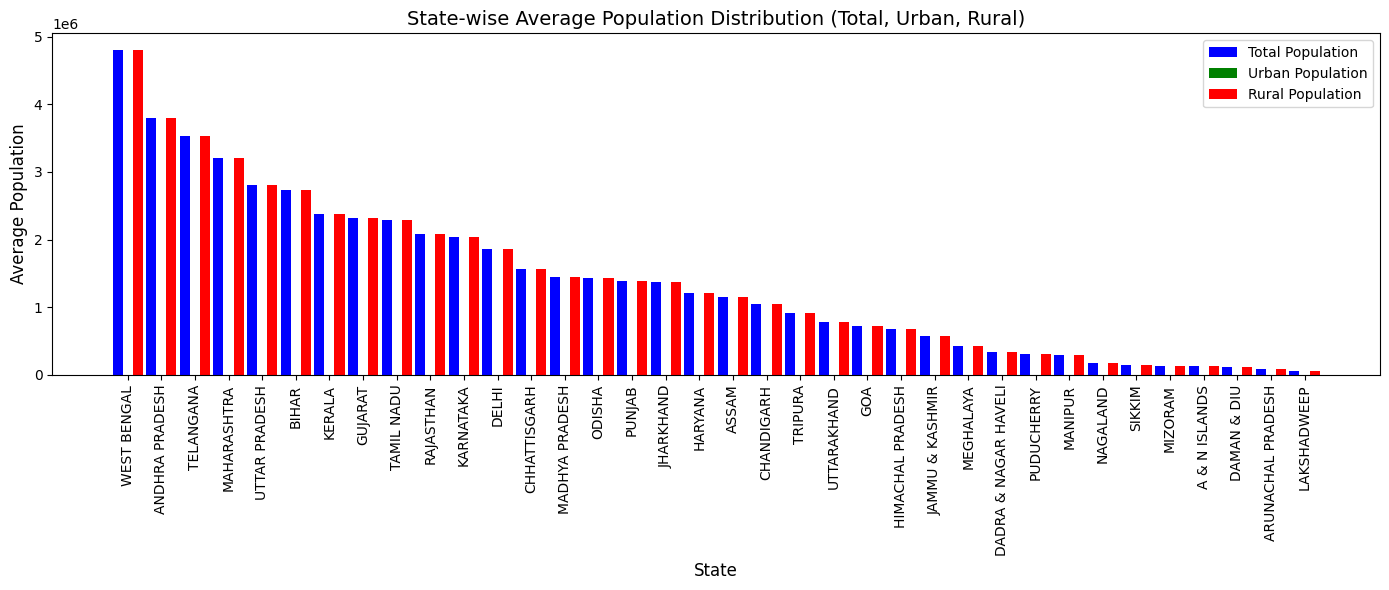

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Set plot size
plt.figure(figsize=(14, 6))

# Bar width
bar_width = 0.3
x = np.arange(len(statewise_pop["STATNAME"]))

# Plot bars
plt.bar(x, statewise_pop["TOTPOPULAT"], width=bar_width, label="Total Population", color="blue")
plt.bar(x + bar_width, statewise_pop["P_URB_POP"], width=bar_width, label="Urban Population", color="green")
plt.bar(x + 2 * bar_width, statewise_pop["P_RURAL_POP"], width=bar_width, label="Rural Population", color="red")

# Labels and Titles
plt.xlabel("State", fontsize=12)
plt.ylabel("Average Population", fontsize=12)
plt.title("State-wise Average Population Distribution (Total, Urban, Rural)", fontsize=14)
plt.xticks(x + bar_width, statewise_pop["STATNAME"], rotation=90)

# Add legend
plt.legend()

# Layout adjustment
plt.tight_layout()

# Show plot
plt.show()


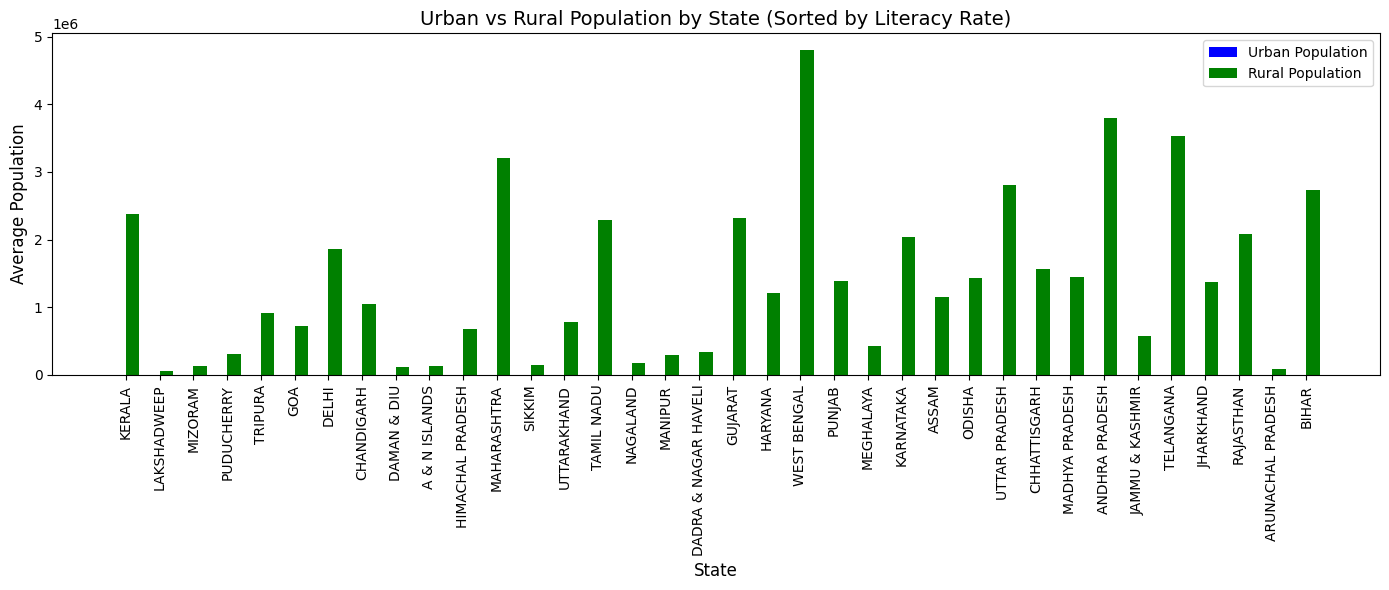

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Compute Rural Population before selecting columns
dist["P_RURAL_POP"] = dist["TOTPOPULAT"] - dist["P_URB_POP"]


# Select relevant columns
df_lit1 = dist[['STATNAME', 'P_URB_POP', 'P_RURAL_POP', 'OVERALL_LI']].copy()

# Drop missing values
df_lit1 = df_lit1.dropna()

# Group by state and compute average values
statewise_lit11 = df_lit1.groupby('STATNAME')[['P_URB_POP', 'P_RURAL_POP', 'OVERALL_LI']].mean().reset_index()

# Sort by literacy rate for better visualization
statewise_lit11 = statewise_lit11.sort_values(by='OVERALL_LI', ascending=False).reset_index(drop=True)

# Set plot size
plt.figure(figsize=(14, 6))

# Bar width
bar_width = 0.4
x = np.arange(len(statewise_lit11["STATNAME"]))

# Plot bars for Urban and Rural Population (ordered by literacy rate)
plt.bar(x, statewise_lit11["P_URB_POP"], width=bar_width, label="Urban Population", color="blue")
plt.bar(x + bar_width, statewise_lit11["P_RURAL_POP"], width=bar_width, label="Rural Population", color="green")

# Labels and Titles
plt.xlabel("State", fontsize=12)
plt.ylabel("Average Population", fontsize=12)
plt.title("Urban vs Rural Population by State (Sorted by Literacy Rate)", fontsize=14)
plt.xticks(x + bar_width / 2, statewise_lit11["STATNAME"], rotation=90)

# Add legend
plt.legend()

# Layout adjustment
plt.tight_layout()

# Show plot
plt.show()


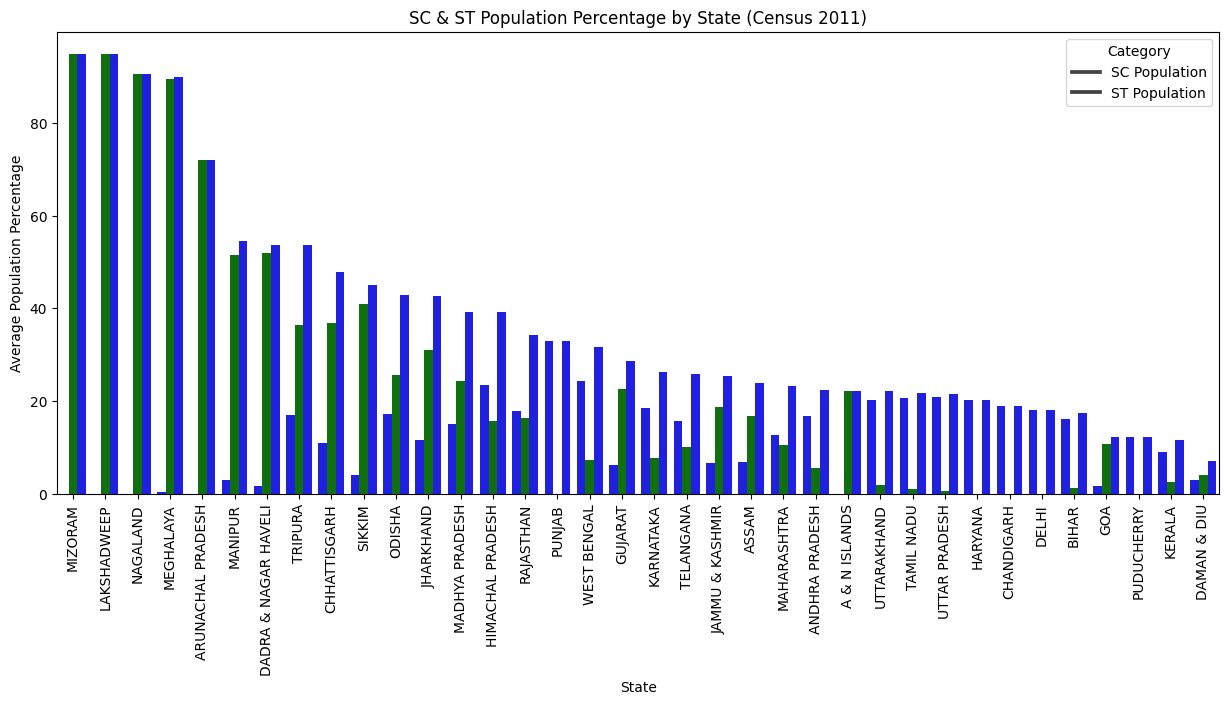

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant columns
df_stats1 = dist[['STATNAME', 'DISTNAME', 'P_SC_POP', 'P_ST_POP']]

# Drop rows with missing values (if any)
df1_stats1 = df_stats1.dropna()


# Group by state and compute mean values
df_grouped = df1_stats1.groupby('STATNAME')[['P_SC_POP', 'P_ST_POP']].mean().reset_index()


# Create total P_SC_ST_POP
df_grouped['P_SC_ST_POP'] = df_grouped['P_SC_POP'] + df_grouped['P_ST_POP']

# Sort by total P_SC_ST_POP in descending order
df_grouped = df_grouped.sort_values(by='P_SC_ST_POP', ascending=False)


# Plotting
plt.figure(figsize=(15, 6))

# Creating a grouped bar chart
ax = sns.barplot(data=df_grouped.melt(id_vars='STATNAME', var_name='Category', value_name='Population %'),
                 x='STATNAME', y='Population %', hue='Category', palette=['blue', 'green'])

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Average Population Percentage")
plt.title("SC & ST Population Percentage by State (Census 2011)")
plt.legend(title="Category", labels=["SC Population", "ST Population"])

# Show the plot
plt.show()


In [16]:
# Print the reshaped DataFrame
print("State-wise SC and ST Population Percentages:")
df_grouped.head() # Displaying the full table without index


State-wise SC and ST Population Percentages:


,STATNAME,P_SC_POP,P_ST_POP,P_SC_ST_POP
23,MIZORAM,0.095000,94.758750,94.853750
18,LAKSHADWEEP,0.000000,94.800000,94.800000
24,NAGALAND,0.000000,90.511818,90.511818
22,MEGHALAYA,0.432857,89.420000,89.852857
2,ARUNACHAL PRADESH,0.000000,71.938750,71.938750


## State-wise Literacy Rates

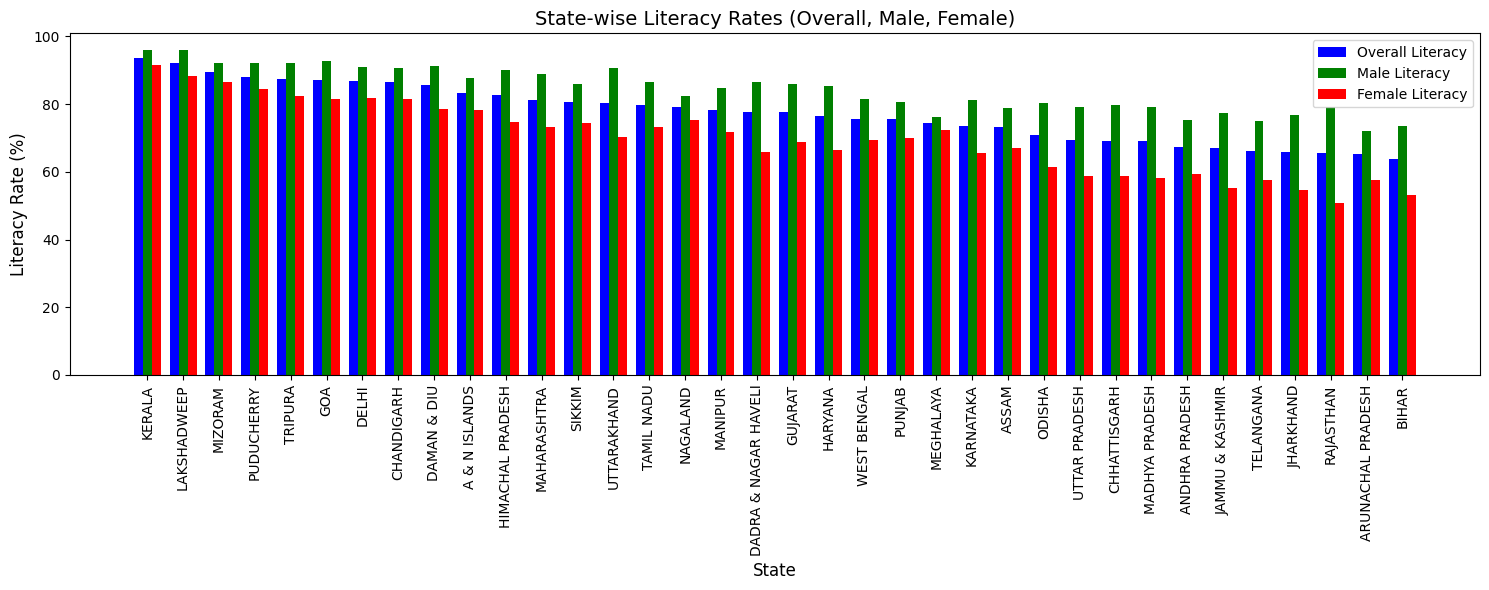

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant columns
df_lit = dist[['STATNAME','DISTNAME', 'OVERALL_LI', 'MALE_LIT', 'FEMALE_LIT']]

# Drop rows with missing values (if any)
df_lit = df_lit.dropna()

# Group by state and calculate the mean literacy rates
statewise_lit = df_lit.groupby('STATNAME')[['OVERALL_LI', 'MALE_LIT', 'FEMALE_LIT']].mean().reset_index()

# Sort by total 
statewise_lit = statewise_lit.sort_values(by='OVERALL_LI', ascending=False)

statewise_lit = statewise_lit.reset_index(drop=True)


# Set plot size
plt.figure(figsize=(15, 6))

# Create bar width and x locations
bar_width = 0.25
x = range(len(statewise_lit['STATNAME']))

# Plot grouped bar chart
plt.bar(x, statewise_lit['OVERALL_LI'], width=bar_width, label='Overall Literacy', color='blue')
plt.bar([i + bar_width for i in x], statewise_lit['MALE_LIT'], width=bar_width, label='Male Literacy', color='green')
plt.bar([i + 2 * bar_width for i in x], statewise_lit['FEMALE_LIT'], width=bar_width, label='Female Literacy', color='red')

# Labels and titles
plt.xlabel("State", fontsize=12)
plt.ylabel("Literacy Rate (%)", fontsize=12)
plt.title("State-wise Literacy Rates (Overall, Male, Female)", fontsize=14)
plt.xticks([i + bar_width for i in x], statewise_lit['STATNAME'], rotation=90)

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


In [18]:
# Print the state-wise literacy rates (Overall, Male, Female)
print("State-wise Literacy Rates (Overall, Male, Female):")
# print(statewise_lit[['STATNAME', 'OVERALL_LI', 'MALE_LIT', 'FEMALE_LIT']].to_string(index=False))  # Display full table without index
statewise_lit.head(36)

State-wise Literacy Rates (Overall, Male, Female):


,STATNAME,OVERALL_LI,MALE_LIT,FEMALE_LIT
0,KERALA,93.648571,95.863571,91.615714
1,LAKSHADWEEP,92.280000,96.110000,88.250000
2,MIZORAM,89.436250,92.140000,86.581250
3,PUDUCHERRY,88.142500,92.075000,84.422500
4,TRIPURA,87.357500,92.017500,82.480000
5,GOA,87.190000,92.665000,81.580000
6,DELHI,86.734444,91.032222,81.747778
7,CHANDIGARH,86.430000,90.540000,81.380000
8,DAMAN & DIU,85.710000,91.385000,78.485000
9,A & N ISLANDS,83.413333,87.760000,78.203333


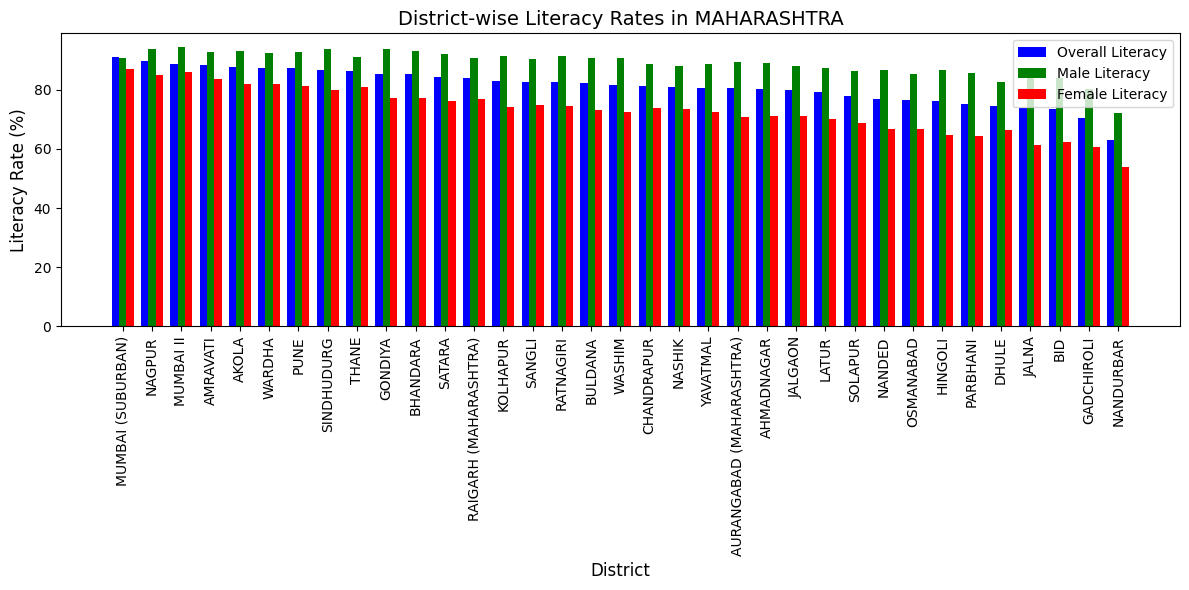

In [19]:
# Select a specific state (Example: 'Maharashtra')
state_name = 'MAHARASHTRA'
df_state = df_lit[df_lit['STATNAME'] == state_name]

# Sort districts for better visualization
df_state = df_state.sort_values(by='OVERALL_LI', ascending=False)

# Set plot size
plt.figure(figsize=(12, 6))

# Create grouped bar chart for districts
bar_width = 0.25
x = range(len(df_state['DISTNAME']))

plt.bar(x, df_state['OVERALL_LI'], width=bar_width, label='Overall Literacy', color='blue')
plt.bar([i + bar_width for i in x], df_state['MALE_LIT'], width=bar_width, label='Male Literacy', color='green')
plt.bar([i + 2 * bar_width for i in x], df_state['FEMALE_LIT'], width=bar_width, label='Female Literacy', color='red')

# Labels and titles
plt.xlabel("District", fontsize=12)
plt.ylabel("Literacy Rate (%)", fontsize=12)
plt.title(f"District-wise Literacy Rates in {state_name}", fontsize=14)
plt.xticks([i + bar_width for i in x], df_state['DISTNAME'], rotation=90)

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


## State-wise Distribution of Schools

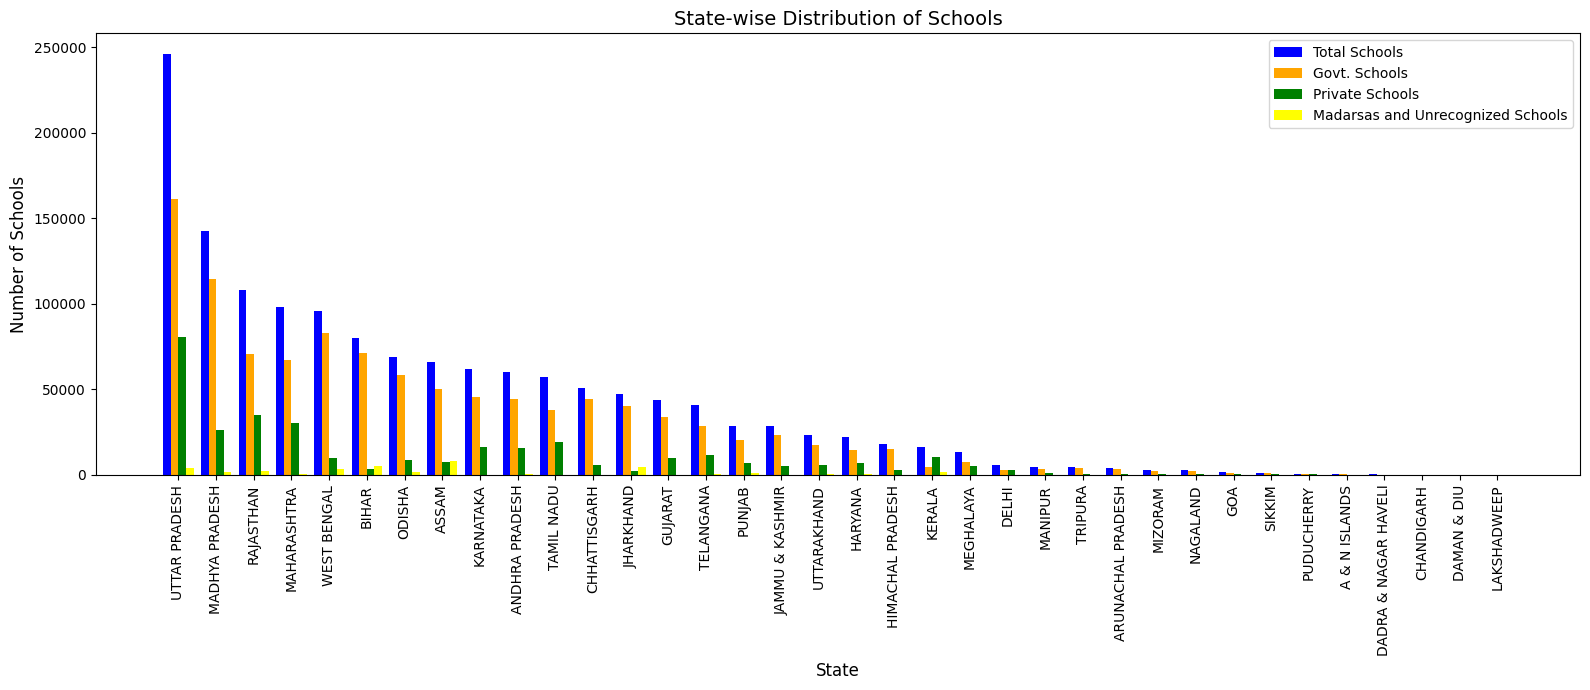

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Group by state and sum up school counts
df_schools = dist.groupby('STATNAME')[['SCHTOT','SCHTOTG','SCHTOTP','SCHTOTM']].sum().reset_index()

# Sort states by total number of schools
df_schools = df_schools.sort_values(by='SCHTOT', ascending=False)  # Sorting by total schools only


df_schools = df_schools.sort_values(by=['SCHTOT'], ascending=False).reset_index(drop=True)


# Define positions for bars
bar_width = 0.2  # Reduced width for better spacing
x = np.arange(len(df_schools['STATNAME']))  # Positions for bars

# Create the grouped bar chart
plt.figure(figsize=(16, 7))
plt.bar(x, df_schools['SCHTOT'], width=bar_width, label='Total Schools', color='blue')
plt.bar(x + bar_width, df_schools['SCHTOTG'], width=bar_width, label='Govt. Schools', color='orange')
plt.bar(x + 2 * bar_width, df_schools['SCHTOTP'], width=bar_width, label='Private Schools', color='green')
plt.bar(x + 3 * bar_width, df_schools['SCHTOTM'], width=bar_width, label='Madarsas and Unrecognized Schools', color='yellow')

# Labels and formatting
plt.xlabel("State", fontsize=12)
plt.ylabel("Number of Schools", fontsize=12)
plt.title("State-wise Distribution of Schools", fontsize=14)
plt.xticks(x + 1.5 * bar_width, df_schools['STATNAME'], rotation=90)  # Adjusted position for readability

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


In [21]:
# Print the values
print("State-wise School Counts:")
df_schools.head()


State-wise School Counts:


,STATNAME,SCHTOT,SCHTOTG,SCHTOTP,SCHTOTM
0,UTTAR PRADESH,245919,161329,80385,4205
1,MADHYA PRADESH,142587,114465,26452,1670
2,RAJASTHAN,107931,70664,34872,2395
3,MAHARASHTRA,98213,67294,30383,536
4,WEST BENGAL,95723,82737,9754,3232


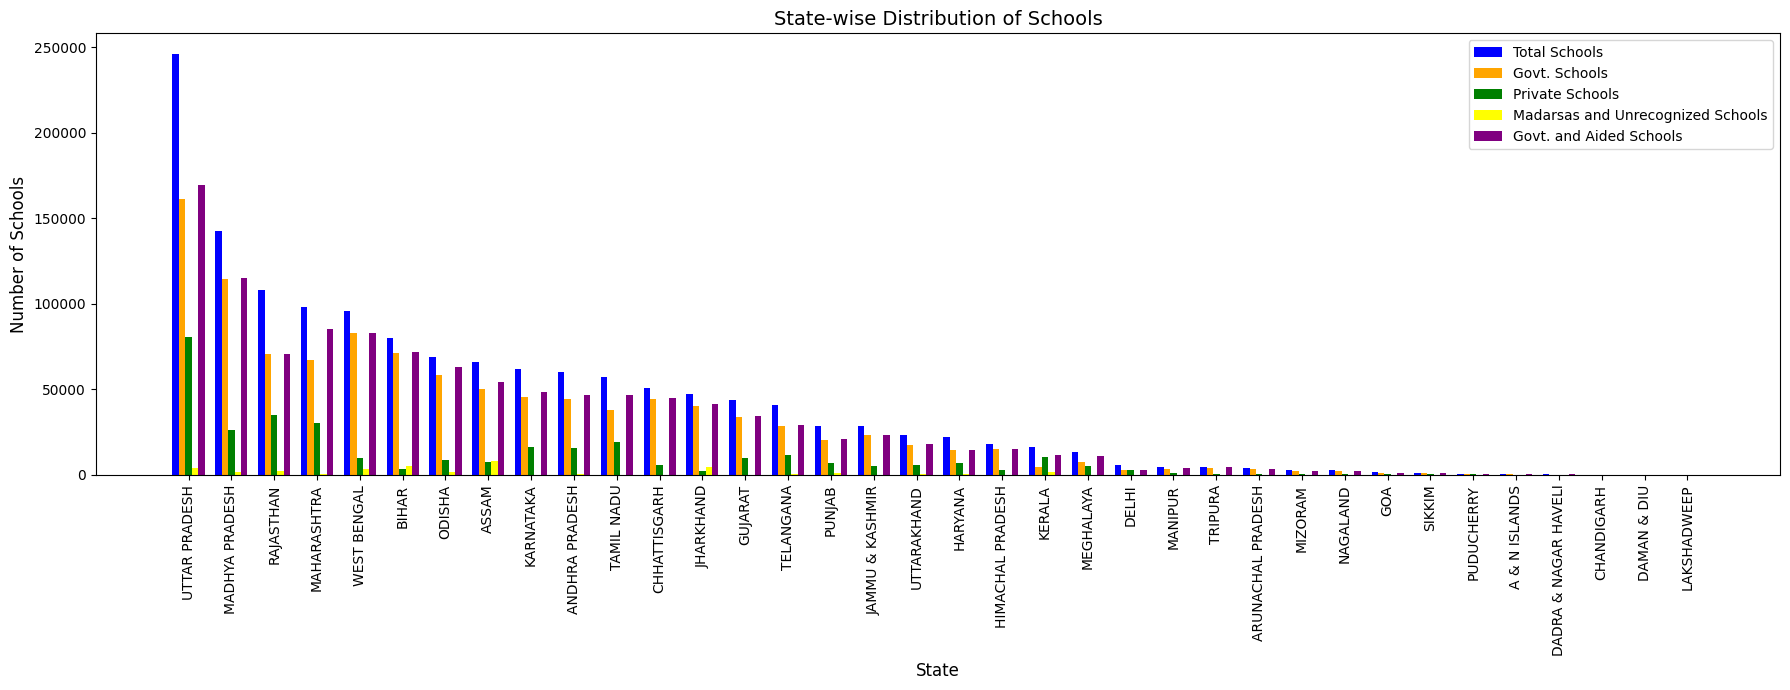

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Group by state and sum up school counts, including the new SCHTOTGA
df_schools1 = dist.groupby('STATNAME')[['SCHTOT', 'SCHTOTG', 'SCHTOTP', 'SCHTOTM', 'SCHTOTGA']].sum().reset_index()

# Sort states by total number of schools
df_schools1 = df_schools1.sort_values(by='SCHTOT', ascending=False)  # Sorting by total schools only

df_schools1 = df_schools1.sort_values(by=['SCHTOT'], ascending=False).reset_index(drop=True)


# Define positions for bars
bar_width = 0.15  # Reduced width for better spacing
x = np.arange(len(df_schools1['STATNAME']))  # Positions for bars

# Create the grouped bar chart
plt.figure(figsize=(18, 7))  # Increased size of the plot for better readability
plt.bar(x, df_schools1['SCHTOT'], width=bar_width, label='Total Schools', color='blue')
plt.bar(x + bar_width, df_schools['SCHTOTG'], width=bar_width, label='Govt. Schools', color='orange')
plt.bar(x + 2 * bar_width, df_schools1['SCHTOTP'], width=bar_width, label='Private Schools', color='green')
plt.bar(x + 3 * bar_width, df_schools1['SCHTOTM'], width=bar_width, label='Madarsas and Unrecognized Schools', color='yellow')
plt.bar(x + 4 * bar_width, df_schools1['SCHTOTGA'], width=bar_width, label='Govt. and Aided Schools', color='purple')

# Labels and formatting
plt.xlabel("State", fontsize=12)
plt.ylabel("Number of Schools", fontsize=12)
plt.title("State-wise Distribution of Schools", fontsize=14)
plt.xticks(x + 2 * bar_width, df_schools1['STATNAME'], rotation=90)  # Adjusted position for readability

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


In [23]:

# Print the values
print("State-wise School Counts:")
df_schools1.head()  


State-wise School Counts:


,STATNAME,SCHTOT,SCHTOTG,SCHTOTP,SCHTOTM,SCHTOTGA
0,UTTAR PRADESH,245919,161329,80385,4205,169373
1,MADHYA PRADESH,142587,114465,26452,1670,115393
2,RAJASTHAN,107931,70664,34872,2395,70664
3,MAHARASHTRA,98213,67294,30383,536,85476
4,WEST BENGAL,95723,82737,9754,3232,82990


In [24]:
# Count how many boys and girls schools exist per state
gender_school_counts = dist.groupby('STATNAME')[['SCHBOYTOT','SCHGIRTOT']].sum().reset_index()

# Display the result
gender_school_counts.head()


,STATNAME,SCHBOYTOT,SCHGIRTOT
0,A & N ISLANDS,409,410
1,ANDHRA PRADESH,59411,60047
2,ARUNACHAL PRADESH,3922,4006
3,ASSAM,64642,65674
4,BIHAR,79771,80052


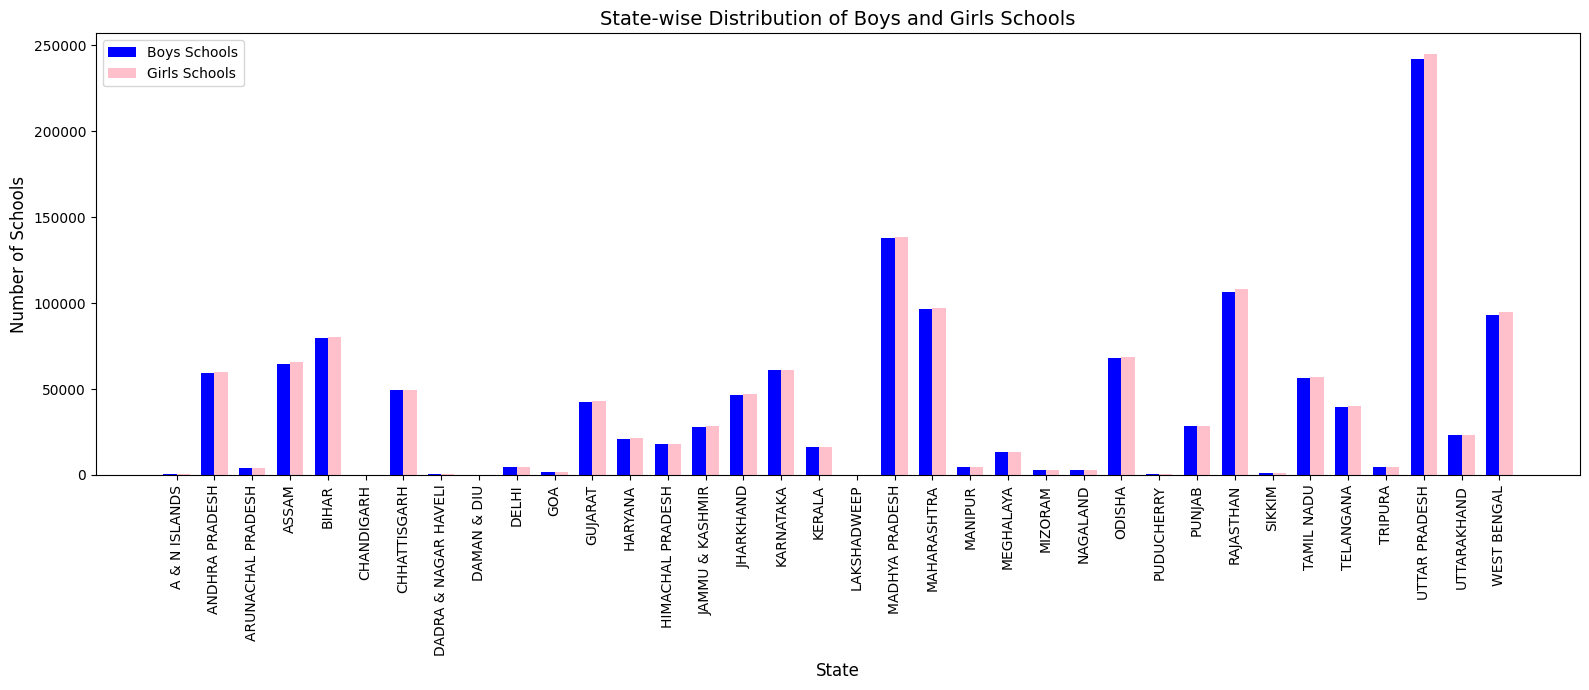

In [25]:
# Define positions for bars
bar_width = 0.35  # Bar width for spacing
x = np.arange(len(gender_school_counts['STATNAME']))  # Positions for bars

# Set plot size
plt.figure(figsize=(16, 7))

# Create the grouped bar chart
plt.bar(x - bar_width/2, gender_school_counts['SCHBOYTOT'], width=bar_width, label='Boys Schools', color='blue')
plt.bar(x + bar_width/2, gender_school_counts['SCHGIRTOT'], width=bar_width, label='Girls Schools', color='pink')

# Labels and formatting
plt.xlabel("State", fontsize=12)
plt.ylabel("Number of Schools", fontsize=12)
plt.title("State-wise Distribution of Boys and Girls Schools", fontsize=14)
plt.xticks(x, gender_school_counts['STATNAME'], rotation=90)  # Adjusted for readability

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

In [26]:

# Count how many private and government rural schools exist per state
RP_RG_school_counts = dist.groupby('STATNAME')[['SCHTOTPR','SCHTOTGR']].sum().reset_index()

# Display the result
RP_RG_school_counts.head()

,STATNAME,SCHTOTPR,SCHTOTGR
0,A & N ISLANDS,44,307
1,ANDHRA PRADESH,8427,40448
2,ARUNACHAL PRADESH,337,3244
3,ASSAM,6999,47764
4,BIHAR,2108,67441


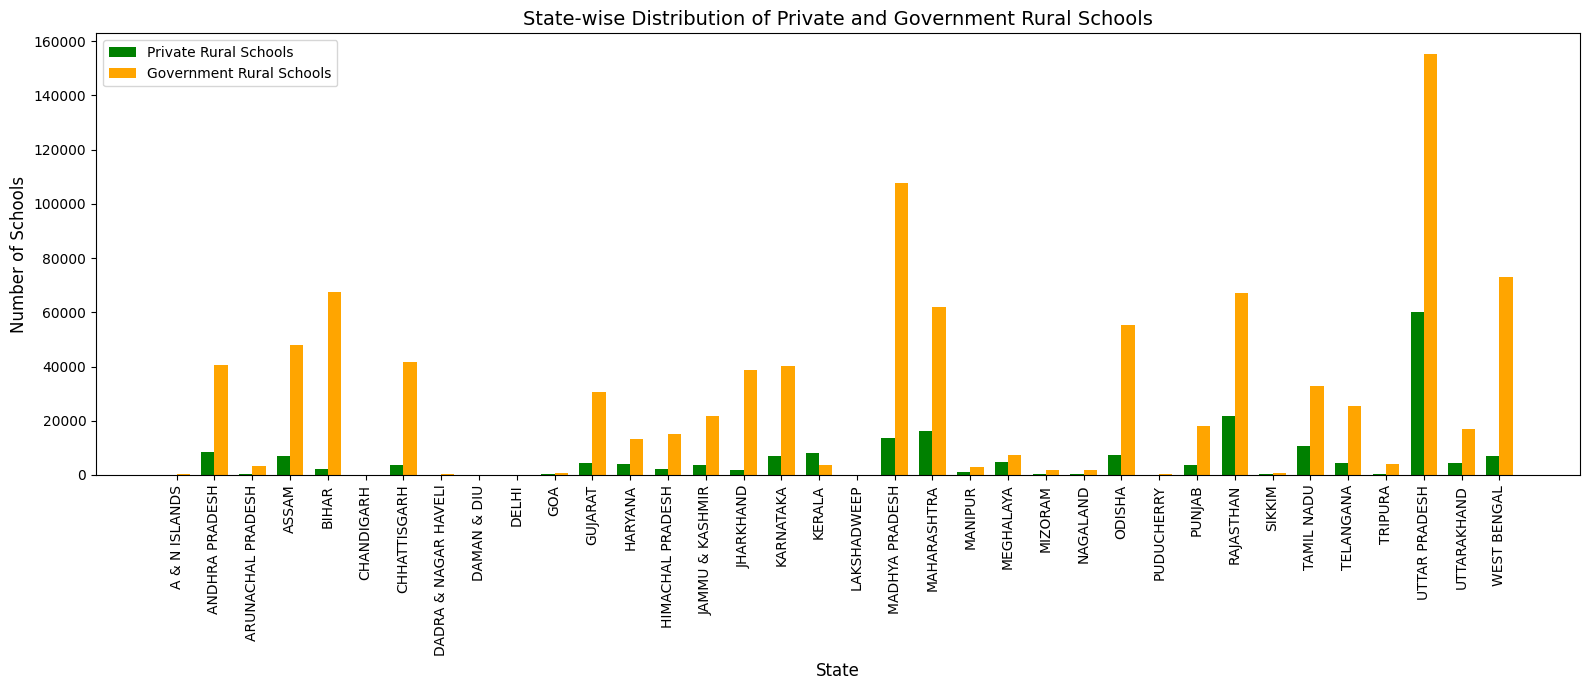

In [27]:
# Define positions for bars
bar_width = 0.35  # Bar width for spacing
x = np.arange(len(RP_RG_school_counts['STATNAME']))  # Positions for bars

# Set plot size
plt.figure(figsize=(16, 7))

# Create the grouped bar chart
plt.bar(x - bar_width/2, RP_RG_school_counts['SCHTOTPR'], width=bar_width, label='Private Rural Schools', color='green')
plt.bar(x + bar_width/2, RP_RG_school_counts['SCHTOTGR'], width=bar_width, label='Government Rural Schools', color='orange')

# Labels and formatting
plt.xlabel("State", fontsize=12)
plt.ylabel("Number of Schools", fontsize=12)
plt.title("State-wise Distribution of Private and Government Rural Schools", fontsize=14)
plt.xticks(x, RP_RG_school_counts['STATNAME'], rotation=90)  # Adjusted for readability

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

In [28]:
# Count how many elementary schools exist per state
E_school_counts = dist.groupby('STATNAME')[['ENRTOT','ENRTOTG','ENRTOTP','ENRTOTM']].sum().reset_index()

# Sort by total 
E_school_counts = E_school_counts.sort_values(by='ENRTOT', ascending=False)

E_school_counts = E_school_counts.reset_index(drop=True)


# Display the result
E_school_counts.head()

,STATNAME,ENRTOT,ENRTOTG,ENRTOTP,ENRTOTM
0,UTTAR PRADESH,36425633,16602729,18876867,946037
1,BIHAR,23431785,21548009,895815,987961
2,MAHARASHTRA,16043775,5949222,10019040,75513
3,WEST BENGAL,12909034,11193885,1143436,571713
4,MADHYA PRADESH,12801969,7979306,4689747,132916


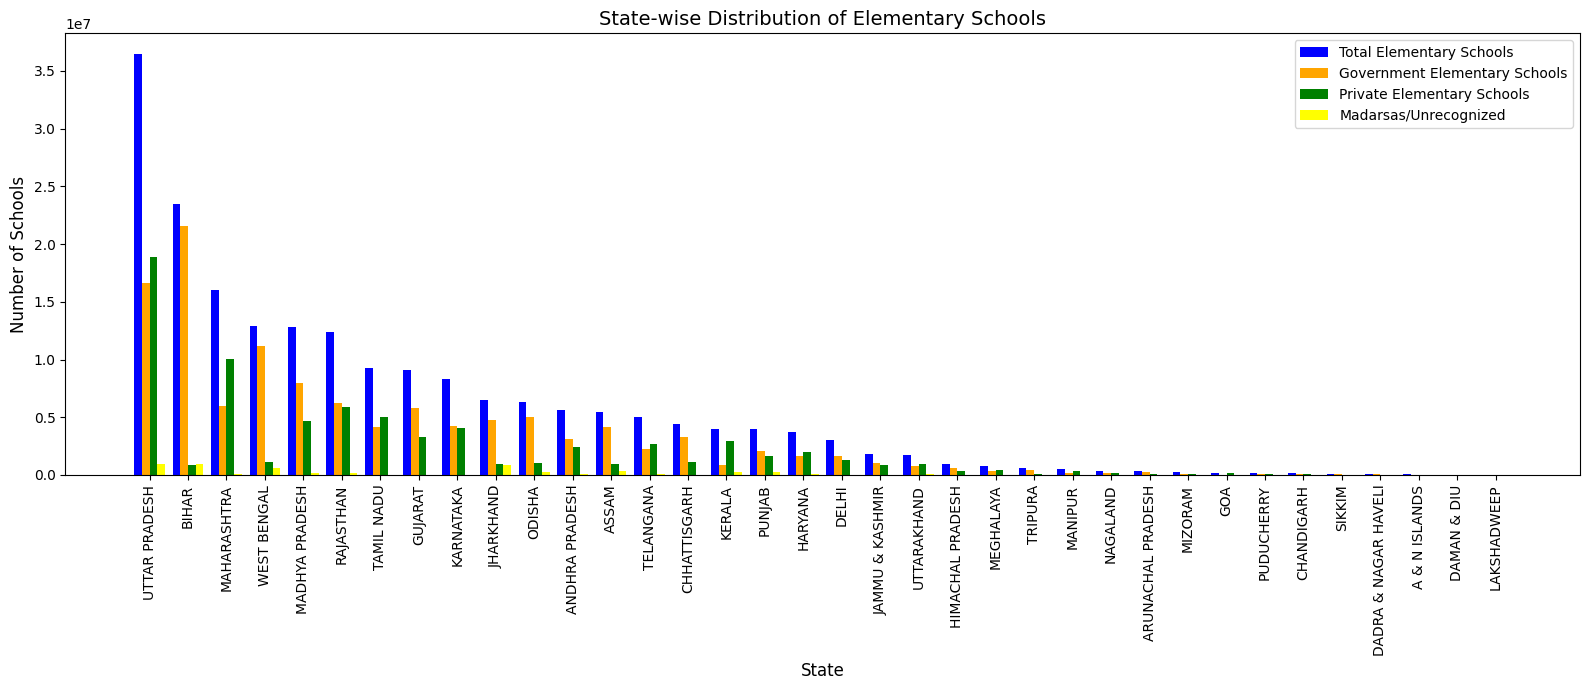

In [29]:
# Define positions for bars
bar_width = 0.2  # Bar width for spacing
x = np.arange(len(E_school_counts['STATNAME']))  # Positions for bars

# Set plot size
plt.figure(figsize=(16, 7))

# Create the grouped bar chart
plt.bar(x - 1.5 * bar_width, E_school_counts['ENRTOT'], width=bar_width, label='Total Elementary Schools', color='blue')
plt.bar(x - 0.5 * bar_width, E_school_counts['ENRTOTG'], width=bar_width, label='Government Elementary Schools', color='orange')
plt.bar(x + 0.5 * bar_width, E_school_counts['ENRTOTP'], width=bar_width, label='Private Elementary Schools', color='green')
plt.bar(x + 1.5 * bar_width, E_school_counts['ENRTOTM'], width=bar_width, label='Madarsas/Unrecognized', color='yellow')

# Labels and formatting
plt.xlabel("State", fontsize=12)
plt.ylabel("Number of Schools", fontsize=12)
plt.title("State-wise Distribution of Elementary Schools", fontsize=14)
plt.xticks(x, E_school_counts['STATNAME'], rotation=90)  # Adjusted for readability

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

In [30]:
# Count how many elementary schools exist per state in rural areas
E_school_counts_rural = dist.groupby('STATNAME')[['ENRTOTGR','ENRTOTPR']].sum().reset_index()

# Create a new column for total schools in rural (sum of all categories)
E_school_counts_rural['TOTAL_RURSCH'] = E_school_counts_rural['ENRTOTGR'] + E_school_counts_rural['ENRTOTPR'] 

# Sort by total 
E_school_counts_rural = E_school_counts_rural.sort_values(by='TOTAL_RURSCH', ascending=False)

E_school_counts_rural = E_school_counts_rural.reset_index(drop=True)

# Display the result
E_school_counts_rural.head()

,STATNAME,ENRTOTGR,ENRTOTPR,TOTAL_RURSCH
0,UTTAR PRADESH,15931346,13777746,29709092
1,BIHAR,20363333,506693,20870026
2,WEST BENGAL,9437510,813785,10251295
3,RAJASTHAN,5817327,3582303,9399630
4,MADHYA PRADESH,7174368,1926579,9100947


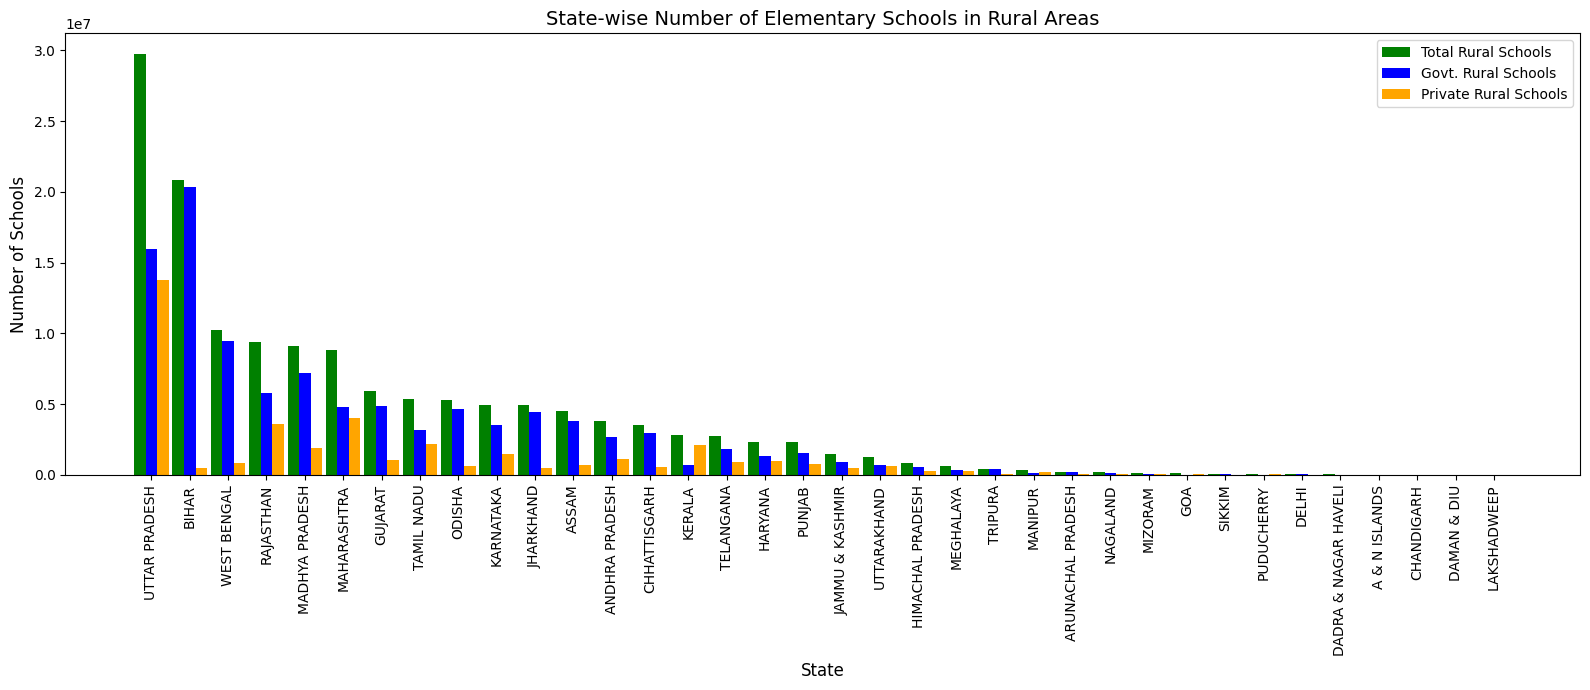

In [31]:

# Define positions for bars
bar_width = 0.3
x = np.arange(len(E_school_counts_rural['STATNAME']))

# Create figure
plt.figure(figsize=(16, 7))

# Plot grouped bar chart
plt.bar(x, E_school_counts_rural['TOTAL_RURSCH'], width=bar_width, label='Total Rural Schools', color='green')
plt.bar(x + bar_width, E_school_counts_rural['ENRTOTGR'], width=bar_width, label='Govt. Rural Schools', color='blue')
plt.bar(x + 2 * bar_width, E_school_counts_rural['ENRTOTPR'], width=bar_width, label='Private Rural Schools', color='orange')

# Labels and formatting
plt.xlabel("State", fontsize=12)
plt.ylabel("Number of Schools", fontsize=12)
plt.title("State-wise Number of Elementary Schools in Rural Areas", fontsize=14)

# Correct x-axis tick positions
plt.xticks(x + bar_width, E_school_counts_rural['STATNAME'], rotation=90)

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


In [32]:
# Count how many teachers in private or government schools exist per state
teachers_counts = dist.groupby('STATNAME')[['TCHTOTG','TCHTOTP','TCHTOTM']].sum().reset_index()

# Create a new column for total teachers (sum of all categories)
teachers_counts['TOTAL_TCH'] = teachers_counts['TCHTOTG'] + teachers_counts['TCHTOTP'] + teachers_counts['TCHTOTM']

# Sort by total teachers and drop the extra column
teachers_counts = teachers_counts.sort_values(by='TOTAL_TCH', ascending=False)

teachers_counts = teachers_counts.reset_index(drop=True)


# Display the result
teachers_counts.head()

,STATNAME,TCHTOTG,TCHTOTP,TCHTOTM,TOTAL_TCH
0,UTTAR PRADESH,529650,468533,20729,1018912
1,MAHARASHTRA,265657,397478,3203,666338
2,RAJASTHAN,329603,319231,7249,656083
3,WEST BENGAL,453965,85432,26249,565646
4,TAMIL NADU,270272,285816,1713,557801


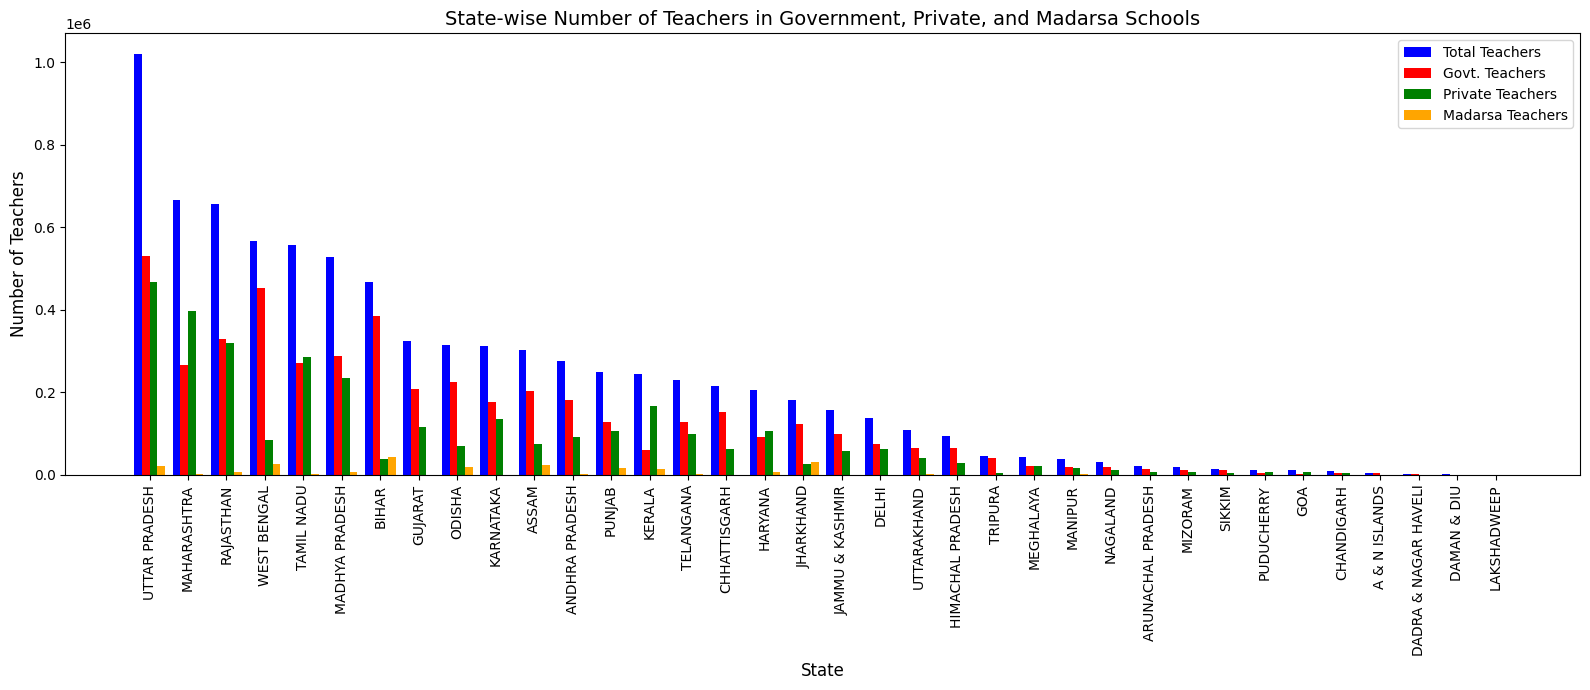

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Define positions for bars
bar_width = 0.2  # Reduce width for better separation
x = np.arange(len(teachers_counts['STATNAME']))  # X positions

# Create the grouped bar chart
plt.figure(figsize=(16, 7))

plt.bar(x, teachers_counts['TOTAL_TCH'], width=bar_width, label='Total Teachers', color='blue')
plt.bar(x + bar_width, teachers_counts['TCHTOTG'], width=bar_width, label='Govt. Teachers', color='red')
plt.bar(x + 2 * bar_width, teachers_counts['TCHTOTP'], width=bar_width, label='Private Teachers', color='green')
plt.bar(x + 3 * bar_width, teachers_counts['TCHTOTM'], width=bar_width, label='Madarsa Teachers', color='orange')

# Labels and formatting
plt.xlabel("State", fontsize=12)
plt.ylabel("Number of Teachers", fontsize=12)
plt.title("State-wise Number of Teachers in Government, Private, and Madarsa Schools", fontsize=14)

# Correcting x-axis tick positions
plt.xticks(x + 1.5 * bar_width, teachers_counts['STATNAME'], rotation=90)

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


In [34]:
df1 = dist.copy()

# Create a new column for Total Male Teachers
df1['TCHMTOT'] = df1[['TCHM1', 'TCHM2', 'TCHM3', 'TCHM4', 'TCHM5', 'TCHM6', 'TCHM7', 'TCHM9']].sum(axis=1)


In [35]:
# Group by state and sum the total male teachers
statewise_teachers = df1.groupby('STATNAME')[['TCHMTOT']].sum().sort_values(by='TCHMTOT', ascending=False).reset_index()


# Display the result
statewise_teachers.head()


,STATNAME,TCHMTOT
0,UTTAR PRADESH,608614
1,RAJASTHAN,427219
2,MAHARASHTRA,377957
3,WEST BENGAL,324190
4,MADHYA PRADESH,297509


In [36]:
# Count how many elementary schools exist per state in rural areas
teachers_cat = df1.groupby('STATNAME')[['TCHTOT','TCHFTOT','TCHMTOT']].sum().reset_index()

# Sort by total 
teachers_cat = teachers_cat.sort_values(by='TCHTOT', ascending=False)

teachers_cat = teachers_cat.reset_index(drop=True)

# Display the result
teachers_cat.head()

,STATNAME,TCHTOT,TCHFTOT,TCHMTOT
0,UTTAR PRADESH,1018912,402580,608614
1,MAHARASHTRA,666338,291639,377957
2,RAJASTHAN,656083,228561,427219
3,WEST BENGAL,565646,238187,324190
4,TAMIL NADU,557801,389578,145430


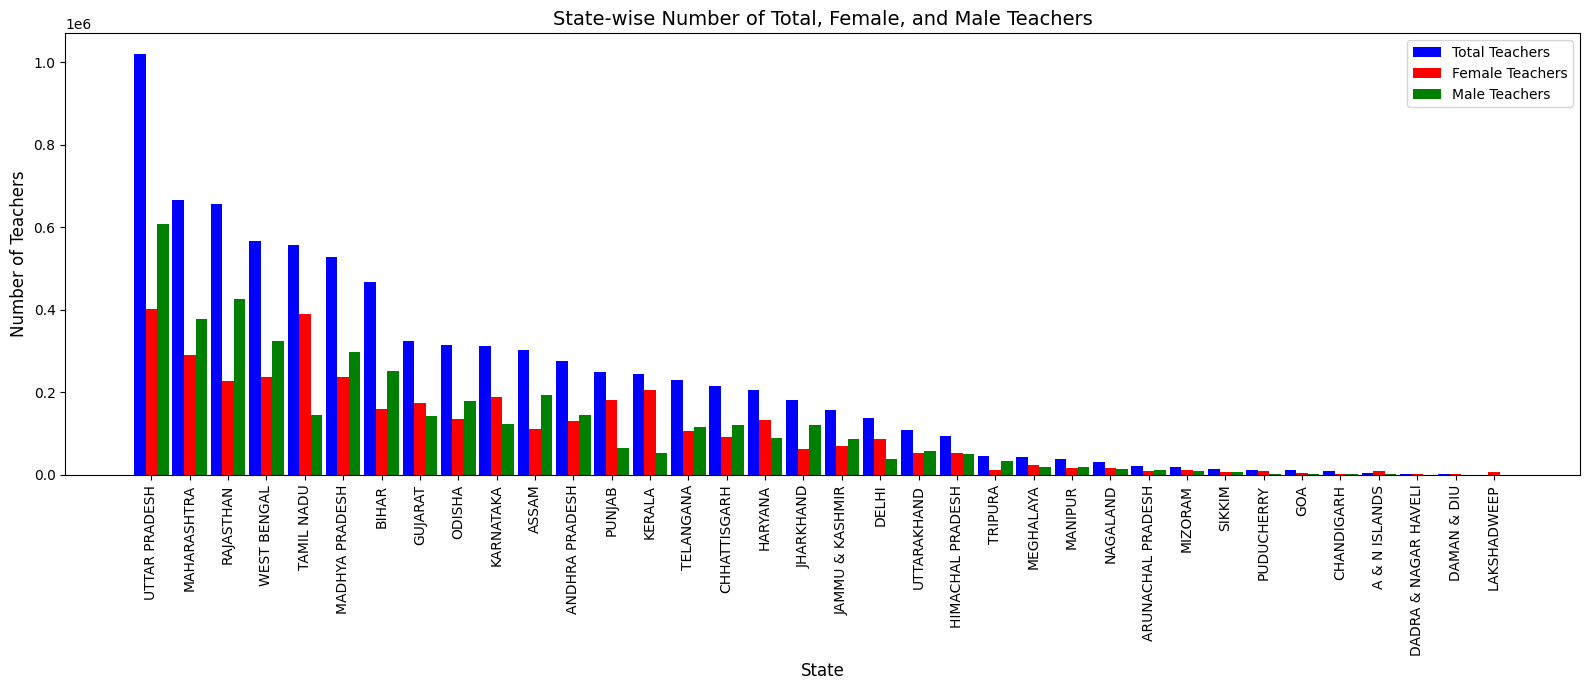

In [37]:
# Define bar width and positions
bar_width = 0.3
x = np.arange(len(teachers_cat['STATNAME']))

# Create the grouped bar chart
plt.figure(figsize=(16, 7))
plt.bar(x, teachers_cat['TCHTOT'], width=bar_width, label='Total Teachers', color='blue')
plt.bar(x + bar_width, teachers_cat['TCHFTOT'], width=bar_width, label='Female Teachers', color='red')
plt.bar(x + 2 * bar_width, teachers_cat['TCHMTOT'], width=bar_width, label='Male Teachers', color='green')

# Labels and formatting
plt.xlabel("State", fontsize=12)
plt.ylabel("Number of Teachers", fontsize=12)
plt.title("State-wise Number of Total, Female, and Male Teachers", fontsize=14)
plt.xticks(x + bar_width, teachers_cat['STATNAME'], rotation=90)

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


### Derived Features for Understanding (Not for model Training)

In [38]:
# Summing up SC, ST, and OBC teachers (male and female) separately
df1['TOTAL_SC_MALE'] = df1[['TCHSCM1', 'TCHSCM2', 'TCHSCM3', 'TCHSCM4', 'TCHSCM5', 'TCHSCM6', 'TCHSCM7']].sum(axis=1)
df1['TOTAL_SC_FEMALE'] = df1[['TCHSCF1', 'TCHSCF2', 'TCHSCF3', 'TCHSCF4', 'TCHSCF5', 'TCHSCF6', 'TCHSCF7']].sum(axis=1)

df1['TOTAL_ST_MALE'] = df1[['TCHSTM1', 'TCHSTM2', 'TCHSTM3', 'TCHSTM4', 'TCHSTM5', 'TCHSTM6', 'TCHSTM7']].sum(axis=1)
df1['TOTAL_ST_FEMALE'] = df1[['TCHSTF1', 'TCHSTF2', 'TCHSTF3', 'TCHSTF4', 'TCHSTF5', 'TCHSTF6', 'TCHSTF7']].sum(axis=1)

df1['TOTAL_OBC_MALE'] = df1[['TCHOBCM1', 'TCHOBCM2', 'TCHOBCM3', 'TCHOBCM4', 'TCHOBCM5', 'TCHOBCM6', 'TCHOBCM7']].sum(axis=1)
df1['TOTAL_OBC_FEMALE'] = df1[['TCHOBCF1', 'TCHOBCF2', 'TCHOBCF3', 'TCHOBCF4', 'TCHOBCF5', 'TCHOBCF6', 'TCHOBCF7']].sum(axis=1)

# Adding total SC, ST, OBC teachers columns
df1['TOTAL_SC_TEACHERS'] = df1['TOTAL_SC_MALE'] + df1['TOTAL_SC_FEMALE']
df1['TOTAL_ST_TEACHERS'] = df1['TOTAL_ST_MALE'] + df1['TOTAL_ST_FEMALE']
df1['TOTAL_OBC_TEACHERS'] = df1['TOTAL_OBC_MALE'] + df1['TOTAL_OBC_FEMALE']


# Group by state and calculate sum
statewise_teachers = df1.groupby('STATNAME')[['TOTAL_SC_TEACHERS', 'TOTAL_ST_TEACHERS', 'TOTAL_OBC_TEACHERS']].sum().reset_index()

# Sort states based on total SC, ST, and OBC teachers in descending order
statewise_teachers = statewise_teachers.sort_values(by=['TOTAL_SC_TEACHERS', 'TOTAL_ST_TEACHERS', 'TOTAL_OBC_TEACHERS'], 
                                                    ascending=[False, False, False]).reset_index(drop=True)

# Display the final result
statewise_teachers.head()


,STATNAME,TOTAL_SC_TEACHERS,TOTAL_ST_TEACHERS,TOTAL_OBC_TEACHERS
0,UTTAR PRADESH,148364,10532,401829
1,WEST BENGAL,110881,26254,59580
2,RAJASTHAN,89890,64375,251362
3,TAMIL NADU,84430,4837,431859
4,MAHARASHTRA,73208,43999,226989


In [39]:
# Summing up in-service trained teachers (male and female) separately
df1['TOTAL_TRAINED_MALE'] = df1[['TCH_TRNRM1', 'TCH_TRNRM2', 'TCH_TRNRM3', 'TCH_TRNRM4', 
                               'TCH_TRNRM5', 'TCH_TRNRM6', 'TCH_TRNRM7']].sum(axis=1)

df1['TOTAL_TRAINED_FEMALE'] = df1[['TCH_TRNRF1', 'TCH_TRNRF2', 'TCH_TRNRF3', 'TCH_TRNRF4', 
                                 'TCH_TRNRF5', 'TCH_TRNRF6', 'TCH_TRNRF7']].sum(axis=1)

# Calculate total trained teachers (male + female)
df1['TOTAL_TRAINED_TEACHERS'] = df1['TOTAL_TRAINED_MALE'] + df1['TOTAL_TRAINED_FEMALE']

# Group by state and sum
statewise_trained_teachers = df1.groupby('STATNAME')[['TOTAL_TRAINED_MALE', 'TOTAL_TRAINED_FEMALE', 
                                                     'TOTAL_TRAINED_TEACHERS']].sum().reset_index()

# Sort by total trained teachers in descending order
statewise_trained_teachers = statewise_trained_teachers.sort_values(by='TOTAL_TRAINED_TEACHERS', 
                                                                    ascending=False).reset_index(drop=True)

# Display results
statewise_trained_teachers.head()


,STATNAME,TOTAL_TRAINED_MALE,TOTAL_TRAINED_FEMALE,TOTAL_TRAINED_TEACHERS
0,TAMIL NADU,53707,129210,182917
1,GUJARAT,93487,83993,177480
2,KARNATAKA,56509,59624,116133
3,BIHAR,55735,35654,91389
4,CHHATTISGARH,52000,25809,77809


In [40]:
# Summing up classrooms based on condition
df1['TOTAL_CLASSROOMS_GOOD'] = df1[['TOTCLGD1G', 'TOTCLGD2G', 'TOTCLGD3G', 'TOTCLGD4G', 
                                  'TOTCLGD5G', 'TOTCLGD6G', 'TOTCLGD7G']].sum(axis=1)

df1['TOTAL_CLASSROOMS_MINOR_REPAIR'] = df1[['TOTCLMI1G', 'TOTCLMI2G', 'TOTCLMI3G', 'TOTCLMI4G', 
                                          'TOTCLMI5G', 'TOTCLMI6G', 'TOTCLMI7G']].sum(axis=1)

df1['TOTAL_CLASSROOMS_MAJOR_REPAIR'] = df1[['TOTCLMJ1G', 'TOTCLMJ2G', 'TOTCLMJ3G', 'TOTCLMJ4G', 
                                          'TOTCLMJ5G', 'TOTCLMJ6G', 'TOTCLMJ7G']].sum(axis=1)

# Calculate total classrooms
df1['TOTAL_CLASSROOMS'] = df1['TOTAL_CLASSROOMS_GOOD'] + df1['TOTAL_CLASSROOMS_MINOR_REPAIR'] + df1['TOTAL_CLASSROOMS_MAJOR_REPAIR']

# Group by state and sum
statewise_classrooms = df1.groupby('STATNAME')[['TOTAL_CLASSROOMS_GOOD', 'TOTAL_CLASSROOMS_MINOR_REPAIR', 
                                               'TOTAL_CLASSROOMS_MAJOR_REPAIR', 'TOTAL_CLASSROOMS']].sum().reset_index()

# Sort by total classrooms in descending order
statewise_classrooms = statewise_classrooms.sort_values(by='TOTAL_CLASSROOMS', ascending=False).reset_index(drop=True)

# Display results
statewise_classrooms.head()


,STATNAME,TOTAL_CLASSROOMS_GOOD,TOTAL_CLASSROOMS_MINOR_REPAIR,TOTAL_CLASSROOMS_MAJOR_REPAIR,TOTAL_CLASSROOMS
0,UTTAR PRADESH,1034505,143900,51124,1229529
1,MADHYA PRADESH,509956,69433,35484,614873
2,RAJASTHAN,511111,52712,29939,593762
3,MAHARASHTRA,455370,31741,29307,516418
4,BIHAR,366375,48836,44004,459215


In [41]:
# Summing up teachers based on qualification
df1['TOTAL_TEACHERS_BELOW_SECONDARY'] = df1[['TCHBS1', 'TCHBS2', 'TCHBS3', 'TCHBS4', 'TCHBS5', 'TCHBS6', 'TCHBS7']].sum(axis=1)
df1['TOTAL_TEACHERS_SECONDARY'] = df1[['TCHSEC1', 'TCHSEC2', 'TCHSEC3', 'TCHSEC4', 'TCHSEC5', 'TCHSEC6', 'TCHSEC7']].sum(axis=1)
df1['TOTAL_TEACHERS_HIGHER_SECONDARY'] = df1[['TCHHS1', 'TCHHS2', 'TCHHS3', 'TCHHS4', 'TCHHS5', 'TCHHS6', 'TCHHS7']].sum(axis=1)
df1['TOTAL_TEACHERS_GRADUATE'] = df1[['TCHGD1', 'TCHGD2', 'TCHGD3', 'TCHGD4', 'TCHGD5', 'TCHGD6', 'TCHGD7']].sum(axis=1)
df1['TOTAL_TEACHERS_POST_GRADUATE'] = df1[['TCHPG1', 'TCHPG2', 'TCHPG3', 'TCHPG4', 'TCHPG5', 'TCHPG6', 'TCHPG7']].sum(axis=1)
df1['TOTAL_TEACHERS_MPHIL_PHD'] = df1[['TCHMD1', 'TCHMD2', 'TCHMD3', 'TCHMD4', 'TCHMD5', 'TCHMD6', 'TCHMD7']].sum(axis=1)
df1['TOTAL_TEACHERS_POST_DOC'] = df1[['TCHPD1', 'TCHPD2', 'TCHPD3', 'TCHPD4', 'TCHPD5', 'TCHPD6', 'TCHPD7']].sum(axis=1)
df1['TOTAL_TEACHERS_NO_RESPONSE'] = df1[['TCHNR1', 'TCHNR2', 'TCHNR3', 'TCHNR4', 'TCHNR5', 'TCHNR6', 'TCHNR7']].sum(axis=1)

# Calculate total teachers
df1['TOTAL_TEACHERS'] = (df1['TOTAL_TEACHERS_BELOW_SECONDARY'] + df1['TOTAL_TEACHERS_SECONDARY'] + 
                          df1['TOTAL_TEACHERS_HIGHER_SECONDARY'] + df1['TOTAL_TEACHERS_GRADUATE'] + 
                          df1['TOTAL_TEACHERS_POST_GRADUATE'] + df1['TOTAL_TEACHERS_MPHIL_PHD'] + 
                          df1['TOTAL_TEACHERS_POST_DOC'] + df1['TOTAL_TEACHERS_NO_RESPONSE'])

# Group by state and sum
statewise_teachers1 = df1.groupby('STATNAME')[['TOTAL_TEACHERS_BELOW_SECONDARY', 'TOTAL_TEACHERS_SECONDARY', 
                                              'TOTAL_TEACHERS_HIGHER_SECONDARY', 'TOTAL_TEACHERS_GRADUATE',
                                              'TOTAL_TEACHERS_POST_GRADUATE', 'TOTAL_TEACHERS_MPHIL_PHD',
                                              'TOTAL_TEACHERS_POST_DOC', 'TOTAL_TEACHERS_NO_RESPONSE',
                                              'TOTAL_TEACHERS']].sum().reset_index()

# Sort by total teachers in descending order
statewise_teachers1 = statewise_teachers1.sort_values(by='TOTAL_TEACHERS', ascending=False).reset_index(drop=True)

# Display results
statewise_teachers1.head()


,STATNAME,TOTAL_TEACHERS_BELOW_SECONDARY,TOTAL_TEACHERS_SECONDARY,TOTAL_TEACHERS_HIGHER_SECONDARY,TOTAL_TEACHERS_GRADUATE,TOTAL_TEACHERS_POST_GRADUATE,TOTAL_TEACHERS_MPHIL_PHD,TOTAL_TEACHERS_POST_DOC,TOTAL_TEACHERS_NO_RESPONSE,TOTAL_TEACHERS
0,UTTAR PRADESH,6621,22736,80452,400837,383556,12057,1757,4120,912136
1,RAJASTHAN,3191,10686,66794,320849,232825,2718,234,52,637349
2,MAHARASHTRA,1619,80870,145638,286784,110057,1819,158,4,626949
3,MADHYA PRADESH,1324,7542,112213,241170,149975,3403,444,9,516080
4,WEST BENGAL,4279,41997,63601,209556,131770,4084,4,1187,456478


In [42]:
# Create a new column summing up all TCHCON columns
df1["Total_Contractual_Teachers"] = df1[["TCHCON1", "TCHCON2", "TCHCON3", "TCHCON4", 
                                         "TCHCON5", "TCHCON67", "TCHCON8", "TCHCON9"]].sum(axis=1)

# Verify the integration
df1[["Total_Contractual_Teachers"]].head()


,Total_Contractual_Teachers
0,1469
1,879
2,306
3,585
4,331


In [43]:
# Summing up male teachers
df1["Total_Regular_Teachers_Male"] = df1[["TCHRM1", "TCHRM2", "TCHRM3", "TCHRM4", 
                                          "TCHRM5", "TCHRM6", "TCHRM7"]].sum(axis=1)

# Summing up female teachers
df1["Total_Regular_Teachers_Female"] = df1[["TCHRF1", "TCHRF2", "TCHRF3", "TCHRF4", 
                                            "TCHRF5", "TCHRF6", "TCHRF7"]].sum(axis=1)

# Summing up teachers with no response
df1["Total_Regular_Teachers_No_Response"] = df1[["TCHRN1", "TCHRN2", "TCHRN3", "TCHRN4", 
                                                 "TCHRN5", "TCHRN6", "TCHRN7"]].sum(axis=1)



In [44]:
# Summing up male contractual teachers
df1["Total_Contractual_Teachers_Male"] = df1[["TCHCM1", "TCHCM2", "TCHCM3", "TCHCM4", 
                                              "TCHCM5", "TCHCM6", "TCHCM7"]].sum(axis=1)

# Summing up female contractual teachers
df1["Total_Contractual_Teachers_Female"] = df1[["TCHCF1", "TCHCF2", "TCHCF3", "TCHCF4", 
                                                "TCHCF5", "TCHCF6", "TCHCF7"]].sum(axis=1)

# Summing up contractual teachers with no response
df1["Total_Contractual_Teachers_No_Response"] = df1[["TCHCN1", "TCHCN2", "TCHCN3", "TCHCN4", 
                                                     "TCHCN5", "TCHCN6", "TCHCN7"]].sum(axis=1)


In [45]:
# Summing up total classrooms across all categories
df1["Total_Classrooms_cat"] = df1[["TOTCLS1G", "TOTCLS2G", "TOTCLS3G", "TOTCLS4G", 
                               "TOTCLS5G", "TOTCLS6G", "TOTCLS7G"]].sum(axis=1)


In [46]:
df2 = df1.copy()

In [47]:
df2.describe()

,STATCD,DISTCD,DISTRICTS,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,P_URB_POP,POPULATION_0_6,GROWTHRATE,...,TOTAL_TEACHERS_NO_RESPONSE,TOTAL_TEACHERS,Total_Contractual_Teachers,Total_Regular_Teachers_Male,Total_Regular_Teachers_Female,Total_Regular_Teachers_No_Response,Total_Contractual_Teachers_Male,Total_Contractual_Teachers_Female,Total_Contractual_Teachers_No_Response,Total_Classrooms_cat
count,680.000000,680.000000,680.0,680.000000,680.000000,680.000000,6.340000e+02,631.000000,6.330000e+02,634.000000,...,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000
mean,17.292647,1745.976471,1.0,10.760294,874.614706,121.226471,1.899024e+06,24.819255,2.494264e+05,17.627886,...,89.586765,10311.923529,1565.344118,5438.085294,4793.236765,80.604412,658.644118,906.377941,0.322059,10869.932353
std,9.451743,944.257509,0.0,9.585360,622.711657,94.040172,1.547475e+06,19.093744,1.985112e+05,11.346020,...,433.641567,7771.900213,2082.840029,4419.232532,4440.480603,408.686676,885.302516,1452.142468,3.807300,7392.335509
min,1.000000,101.000000,1.0,1.000000,6.000000,1.000000,7.948000e+03,-25.350000,1.103980e+03,-58.390000,...,0.000000,44.000000,0.000000,32.000000,8.000000,0.000000,0.000000,0.000000,0.000000,136.000000
25%,9.000000,937.750000,1.0,5.000000,390.750000,56.750000,8.226940e+05,11.375000,1.087804e+05,12.052500,...,0.000000,4718.250000,273.000000,2422.500000,1881.750000,0.000000,87.750000,143.000000,0.000000,5815.000000
50%,18.000000,1823.500000,1.0,8.000000,785.500000,101.000000,1.564392e+06,19.500000,2.040779e+05,17.055000,...,0.000000,8606.500000,834.500000,4420.000000,3585.000000,0.000000,378.000000,441.500000,0.000000,9618.000000
75%,24.000000,2413.250000,1.0,13.000000,1204.250000,162.500000,2.587520e+06,32.420000,3.378675e+05,22.740000,...,0.000000,14157.250000,2106.500000,7300.500000,6133.000000,0.000000,874.750000,1074.500000,0.000000,14755.500000
max,36.000000,3610.000000,1.0,66.000000,3963.000000,592.000000,1.105413e+07,100.000000,1.256855e+06,111.010000,...,5188.000000,70663.000000,18717.000000,39159.000000,31504.000000,4892.000000,7038.000000,16829.000000,78.000000,64754.000000


In [48]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Columns: 854 entries, AC_YEAR to Total_Classrooms_cat
dtypes: float64(14), int64(837), object(3)
memory usage: 4.4+ MB


In [49]:
missing_counts = df2.isnull().sum()
print(f"Total columns with missing values: {missing_counts[missing_counts > 0].count()}")

Total columns with missing values: 14


In [50]:
# Count total duplicate rows
duplicate_rows = df2.duplicated().sum()
print(f"Total duplicate rows: {duplicate_rows}")

Total duplicate rows: 0


In [51]:
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()
    
    # Percentage of missing values
    mis_val_percent = 100 * mis_val / len(df)
    
    # Create DataFrame
    mis_val_table = pd.DataFrame({
        'Missing Values': mis_val, 
        '% of Total Values': mis_val_percent
    })
    
    # Filter out columns with no missing values
    mis_val_table = mis_val_table[mis_val_table['Missing Values'] > 0]
    
    # Sort by percentage of missing descending
    mis_val_table = mis_val_table.sort_values('% of Total Values', ascending=False).round(1)
    
    # Print summary
    print(f"Your selected dataframe has {df.shape[1]} columns.")
    print(f"There are {mis_val_table.shape[0]} columns with missing values.")
    
    return mis_val_table

In [52]:
missing_values = missing_values_table(df2)
missing_values.head(15)

Your selected dataframe has 854 columns.
There are 14 columns with missing values.


,Missing Values,% of Total Values
P_URB_POP,49,7.2
P_RURAL_POP,49,7.2
POPULATION_0_6,47,6.9
P_SC_POP,47,6.9
P_ST_POP,47,6.9
TOTPOPULAT,46,6.8
GROWTHRATE,46,6.8
SEXRATIO,46,6.8
OVERALL_LI,46,6.8
TOT_6_10_15,46,6.8


In [53]:
import pandas as pd

def analyze_cols(df, threshold=0.9, target_col='OVERALL_LI'):
    """
    Identifies and displays:
    1. Columns with > `threshold`% missing values (`null_cols`)
    2. Columns with > `threshold`% of the same value (`ul_cols`)
    3. Columns with only one unique value (`onev_cols`)
    4. Final columns to drop (`cols_to_drop`)

    Returns a dictionary with lists of columns.
    """

    # Columns with >90% missing values
    null_cols = [col for col in df.columns if df[col].isna().sum() / df.shape[0] > threshold]

    # Columns with >90% of the same value
    ul_cols = [col for col in df.columns if df[col].value_counts(dropna=False, normalize=True).values[0] > threshold]

    # Columns with only one unique value
    onev_cols = [col for col in df.columns if df[col].nunique() <= 1]

    # Combine all columns
    cols_to_drop = list(set(null_cols + ul_cols + onev_cols))

    # Ensure target column is not removed
    if target_col in cols_to_drop:
        cols_to_drop.remove(target_col)

    return {
        "null_cols": null_cols,
        "ul_cols": ul_cols,
        "onev_cols": onev_cols,
        "cols_to_drop": cols_to_drop
    }

In [54]:
# Analyze train dataset
train_results = analyze_cols(df2)
# View each list separately
print("Null Columns:", train_results["null_cols"])
print("Uniform Value Columns:", train_results["ul_cols"])
print("One Unique Value Columns:", train_results["onev_cols"])
print("Final Columns to Drop:", train_results["cols_to_drop"])


# Print summaries outside the function
print(f"\nColumns with >{0.9 * 100}% missing values: {len(train_results['null_cols'])}")
print(f"Columns with >{0.9 * 100}% of the same value: {len(train_results['ul_cols'])}")
print(f"Columns with only one unique value: {len(train_results['onev_cols'])}")
print(f"Final columns to drop: {len(train_results['cols_to_drop'])}\n")


Null Columns: []
Uniform Value Columns: ['AC_YEAR', 'DISTRICTS', 'SCH9', 'SCH9G', 'SCH9P', 'SCH5M', 'SCH9M', 'SCH9GR', 'SCH9GA', 'SCH9PR', 'SCHBOY9', 'SCHGIR9', 'ENR5M', 'ENR9M', 'TCH9G', 'TCH9P', 'TCH5M', 'TCH9M', 'STCH5', 'TCHM9', 'TCHPD7', 'TCHNR4', 'TCHNR6', 'TCHNR7', 'TCHCON9', 'TCHRN3', 'TCHRN4', 'TCHRN5', 'TCHRN6', 'TCHRN7', 'TCHCN1', 'TCHCN2', 'TCHCN3', 'TCHCN4', 'TCHCN5', 'TCHCN6', 'TCHCN7', 'ENRE43', 'ENRE46', 'ENRE53', 'ENRE54', 'ENRE55', 'ENRE56', 'ENRE57', 'Total_Contractual_Teachers_No_Response']
One Unique Value Columns: ['AC_YEAR', 'DISTRICTS', 'SCH9', 'SCH9G', 'SCH9P', 'SCH9M', 'SCH9GR', 'SCH9GA', 'SCH9PR', 'SCHBOY9', 'SCHGIR9', 'TCH9G', 'TCH9P', 'TCH9M', 'TCHM9', 'TCHCN3']
Final Columns to Drop: ['TCHRN6', 'ENRE54', 'ENRE43', 'TCHPD7', 'TCHRN5', 'TCH5M', 'TCH9P', 'TCHM9', 'SCH9GR', 'SCH9P', 'TCHNR6', 'AC_YEAR', 'TCHCN1', 'TCHCN6', 'TCHNR7', 'SCHBOY9', 'SCH9', 'TCHRN4', 'TCHCN3', 'TCHNR4', 'SCHGIR9', 'ENR9M', 'TCHCN4', 'TCHRN3', 'ENRE46', 'ENR5M', 'TCH9M', 'SCH9M', 'ST

In [55]:
df2.dtypes

AC_YEAR                                   object
STATCD                                     int64
DISTCD                                     int64
STATNAME                                  object
DISTNAME                                  object
                                           ...  
Total_Regular_Teachers_No_Response         int64
Total_Contractual_Teachers_Male            int64
Total_Contractual_Teachers_Female          int64
Total_Contractual_Teachers_No_Response     int64
Total_Classrooms_cat                       int64
Length: 854, dtype: object

In [56]:
# Select numerical columns (including both int and float)
num_cols_train = df2.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Print selected numerical columns
print("Numerical Columns in train:", num_cols_train)

# Print length of selected numerical columns
print("Numerical Columns length in train:", len(num_cols_train))


Numerical Columns in train: ['STATCD', 'DISTCD', 'DISTRICTS', 'BLOCKS', 'VILLAGES', 'CLUSTERS', 'TOTPOPULAT', 'P_URB_POP', 'POPULATION_0_6', 'GROWTHRATE', 'SEXRATIO', 'P_SC_POP', 'P_ST_POP', 'OVERALL_LI', 'FEMALE_LIT', 'MALE_LIT', 'AREA_SQKM', 'TOT_6_10_15', 'TOT_11_13_15', 'SCH1', 'SCH2', 'SCH3', 'SCH4', 'SCH5', 'SCH6', 'SCH7', 'SCH9', 'SCHTOT', 'SCH1G', 'SCH2G', 'SCH3G', 'SCH4G', 'SCH5G', 'SCH6G', 'SCH7G', 'SCH9G', 'SCHTOTG', 'SCH1P', 'SCH2P', 'SCH3P', 'SCH4P', 'SCH5P', 'SCH6P', 'SCH7P', 'SCH9P', 'SCHTOTP', 'SCH1M', 'SCH2M', 'SCH3M', 'SCH4M', 'SCH5M', 'SCH6M', 'SCH7M', 'SCH9M', 'SCHTOTM', 'SCH1GR', 'SCH2GR', 'SCH3GR', 'SCH4GR', 'SCH5GR', 'SCH6GR', 'SCH7GR', 'SCH9GR', 'SCHTOTGR', 'SCH1GA', 'SCH2GA', 'SCH3GA', 'SCH4GA', 'SCH5GA', 'SCH6GA', 'SCH7GA', 'SCH9GA', 'SCHTOTGA', 'SCH1PR', 'SCH2PR', 'SCH3PR', 'SCH4PR', 'SCH5PR', 'SCH6PR', 'SCH7PR', 'SCH9PR', 'SCHTOTPR', 'SCHBOY1', 'SCHBOY2', 'SCHBOY3', 'SCHBOY4', 'SCHBOY5', 'SCHBOY6', 'SCHBOY7', 'SCHBOY9', 'SCHBOYTOT', 'SCHGIR1', 'SCHGIR2', 'SC

In [57]:
# # Compute correlation matrix
# corr_matrix = df2[num_cols_train].corr()

# # Print correlation matrix
# print(corr_matrix)

# # Visualize using a heatmap
# plt.figure(figsize=(12, 8))
# sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
# plt.title("Correlation Matrix of Numerical Features")
# plt.show()

In [58]:
# Select categorical columns based on data type
cat_cols_train = df2.select_dtypes(include=['object']).columns.tolist()



# Print selected categorical columns
print("Categorical Columns in train :", cat_cols_train)

# Print length selected categorical columns
print("Categorical Columns length in train :", len(cat_cols_train))


Categorical Columns in train : ['AC_YEAR', 'STATNAME', 'DISTNAME']
Categorical Columns length in train : 3


In [59]:
from sklearn.impute import KNNImputer
import pandas as pd

# List of columns to apply KNN imputation
knn_cols = [
    "P_URB_POP", "POPULATION_0_6", "P_SC_POP", "P_ST_POP", "TOTPOPULAT", 
    "GROWTHRATE", "SEXRATIO", "OVERALL_LI", "TOT_6_10_15", "TOT_11_13_15", 
    "FEMALE_LIT", "MALE_LIT", "AREA_SQKM",'P_RURAL_POP'
]

# Extract only the relevant columns for imputation
df_knn = df2[knn_cols]

# Apply KNN imputation
knn_imputer = KNNImputer(n_neighbors=5)
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df_knn), columns=knn_cols)

# Replace the imputed columns in the original dataset
df2[knn_cols] = df_knn_imputed



In [60]:
missing_values = missing_values_table(df2)
missing_values.head(15)

Your selected dataframe has 854 columns.
There are 0 columns with missing values.


,Missing Values,% of Total Values


In [61]:
df3 = df2.copy()

# Drop columns from train dataset
df3 = df2.drop(train_results['cols_to_drop'], axis=1)


In [62]:
df3.shape

(680, 809)

In [63]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Apply label encoding to categorical columns
df3['STATNAME'] = label_encoder.fit_transform(df3['STATNAME'])
df3['DISTNAME'] = label_encoder.fit_transform(df3['DISTNAME'])


### Feature Engineering

In [64]:
df4 = df3.copy()

# 1. Teacher-Student Ratio: How many students per teacher
# Use 'TCHTOT' for total teachers and 'ENRTOT' for total enrollment
df4['teacher_student_ratio'] = df4['TCHTOT'] / (df4['ENRTOT'] + 1)  # +1 to avoid division by zero

# 2. School Density: Number of schools per unit area (schools per square km)
df4['school_density'] = df4['SCHTOT'] / (df4['AREA_SQKM'] + 1)

# 3. Child Population Ratio: Proportion of children (0-6) in the total population
df4['child_population_ratio'] = df4['POPULATION_0_6'] / (df4['TOTPOPULAT'] + 1)

# 4. Urban-Rural Ratio: Ratio of urban to rural population
# Assuming 'P_URB_POP' is a percentage, we calculate:
df4['urban_rural_ratio'] = df4['P_URB_POP'] / (100 - df4['P_URB_POP'] + 1e-5)

# 5. Vulnerable Population Ratio: Combined percentage of SC and ST populations (if given in %)
df4['vulnerable_population_ratio'] = (df4['P_SC_POP'] + df4['P_ST_POP']) / 100

# 6. Enrollment Proportion: Proportion of the total population that is enrolled in schools
df4['enrollment_proportion'] = df4['ENRTOT'] / (df4['TOTPOPULAT'] + 1)

# 7. Literacy Gender Gap: Difference between male and female literacy rates
df4['literacy_gender_gap'] = df4['MALE_LIT'] - df4['FEMALE_LIT']

# 8. Growth-Population Interaction: Interaction between growth rate and total population
df4['growth_population_interaction'] = df4['GROWTHRATE'] * df4['TOTPOPULAT']

# 9. Schools per Enrollment: Ratio of schools to enrollment; can indicate school density in terms of student distribution
df4['schools_per_enrollment'] = df4['SCHTOT'] / (df4['ENRTOT'] + 1)

# 10. Teacher-School Ratio: How many teachers per school
df4['teacher_school_ratio'] = df4['TCHTOT'] / (df4['SCHTOT'] + 1)

# 11. Government School Ratio: Proportion of government schools relative to all schools
df4['gov_school_ratio'] = df4['SCHTOTG'] / (df4['SCHTOT'] + 1)

# Display a sample of the new features to verify
new_features = ['teacher_student_ratio', 'school_density', 'child_population_ratio', 
                'urban_rural_ratio', 'vulnerable_population_ratio', 'enrollment_proportion', 
                'literacy_gender_gap', 'growth_population_interaction', 'schools_per_enrollment', 
                'teacher_school_ratio', 'gov_school_ratio']

df4[new_features].head()


,teacher_student_ratio,school_density,child_population_ratio,urban_rural_ratio,vulnerable_population_ratio,enrollment_proportion,literacy_gender_gap,growth_population_interaction,schools_per_enrollment,teacher_school_ratio,gov_school_ratio
0,0.076490,0.872269,0.2250,0.127777,0.0820,0.145686,22.31,30312025.68,0.016275,4.697641,0.862783
1,0.069402,0.544298,0.1594,0.207584,0.0389,0.180311,22.34,20655331.02,0.012616,5.498918,0.834704
2,0.088181,0.497475,0.1227,77.739545,0.0081,0.094080,14.48,29915333.56,0.008246,10.683570,0.495943
3,0.087058,1.077827,0.2049,0.133016,0.0322,0.129827,21.96,15583248.54,0.015368,5.660994,0.836624
4,0.100724,0.945722,0.1713,0.160093,0.0410,0.107611,21.60,16634350.80,0.016757,6.004859,0.789116


### RandomForestRegressor Model

In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define target columns
target_cols = ['OVERALL_LI', 'MALE_LIT', 'FEMALE_LIT']

# Define feature columns (excluding target variables)
feature_cols = [col for col in df4.columns if col not in target_cols]

# Create feature dataset (X)
X = df4[feature_cols]

# # Drop 'AC_YEAR' (categorical & not useful)
# X = X.drop(columns=['AC_YEAR'])

# Scale features (standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define function to train & evaluate models
def train_and_evaluate(target_col):
    print(f"\n🔹 Training for {target_col} 🔹")

    # Define target variable (y)
    y = df2[target_col]

    # Split data into train & test (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Initialize models
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

    # Train models
    rf_model.fit(X_train, y_train)
    xgb_model.fit(X_train, y_train)

    # Make predictions
    rf_preds = rf_model.predict(X_test)
    xgb_preds = xgb_model.predict(X_test)

    # Evaluate models
    def evaluate_model(model_name, y_test, y_pred):
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        print(f"\n📊 {model_name} Performance for {target_col}:")
        print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R² Score: {r2:.4f}")

    evaluate_model("Random Forest", y_test, rf_preds)
    evaluate_model("XGBoost", y_test, xgb_preds)

# Train & evaluate for each target column separately
for col in target_cols:
    train_and_evaluate(col)



🔹 Training for OVERALL_LI 🔹

📊 Random Forest Performance for OVERALL_LI:
MAE: 3.76, MSE: 25.51, RMSE: 5.05, R² Score: 0.7347

📊 XGBoost Performance for OVERALL_LI:
MAE: 3.68, MSE: 23.02, RMSE: 4.80, R² Score: 0.7606

🔹 Training for MALE_LIT 🔹

📊 Random Forest Performance for MALE_LIT:
MAE: 3.89, MSE: 28.37, RMSE: 5.33, R² Score: 0.5825

📊 XGBoost Performance for MALE_LIT:
MAE: 3.82, MSE: 26.92, RMSE: 5.19, R² Score: 0.6038

🔹 Training for FEMALE_LIT 🔹

📊 Random Forest Performance for FEMALE_LIT:
MAE: 3.92, MSE: 24.80, RMSE: 4.98, R² Score: 0.8368

📊 XGBoost Performance for FEMALE_LIT:
MAE: 3.40, MSE: 21.33, RMSE: 4.62, R² Score: 0.8596


### Catboost Model

In [66]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import shap

# Define target columns
target_cols = ['OVERALL_LI', 'MALE_LIT', 'FEMALE_LIT']

# Define feature columns (excluding target variables)
feature_cols = [col for col in df4.columns if col not in target_cols]

# Create feature dataset (X)
X = df4[feature_cols]


# Function to get feature importance from SHAP for CatBoost
def get_shap_feature_importance(cat_model, X_train, feature_names, target_col):
    explainer = shap.Explainer(cat_model)
    shap_values = explainer(X_train)

    # Calculate mean absolute SHAP values for feature importance
    mean_abs_shap = np.abs(shap_values.values).mean(axis=0)

    # Sort features by importance
    shap_importance = sorted(zip(feature_names, mean_abs_shap), key=lambda x: x[1], reverse=True)

    print(f"\n📊 Top Features for {target_col} (CatBoost SHAP Importance):")
    for i, (feature, importance) in enumerate(shap_importance[:10]):  # Show top 10
        print(f"{i+1}. {feature}: {importance:.4f}")

# Function to train & evaluate CatBoost
def train_and_evaluate_catboost(target_col):
    print(f"\n🔹 Training for {target_col} (CatBoost) 🔹")

    # Define target variable (y)
    y = df4[target_col]

    # Split data into train & test (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Initialize CatBoost model
    cat_model = CatBoostRegressor(iterations=500, learning_rate=0.05, depth=6, l2_leaf_reg=3, loss_function='RMSE', verbose=0, random_state=42)

    # Train model
    cat_model.fit(X_train, y_train)

    # Make predictions
    cat_preds = cat_model.predict(X_test)

    # Evaluate model
    def evaluate_model(model_name, y_test, y_pred):
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        print(f"\n📊 {model_name} Performance for {target_col}:")
        print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R² Score: {r2:.4f}")

    evaluate_model("CatBoost", y_test, cat_preds)

    # Get SHAP feature importance
    get_shap_feature_importance(cat_model, X_train, feature_cols, target_col)

# Train & evaluate for each target column separately
for col in target_cols:
    train_and_evaluate_catboost(col)



🔹 Training for OVERALL_LI (CatBoost) 🔹

📊 CatBoost Performance for OVERALL_LI:
MAE: 3.31, MSE: 19.93, RMSE: 4.46, R² Score: 0.7927

📊 Top Features for OVERALL_LI (CatBoost SHAP Importance):
1. child_population_ratio: 2.6569
2. literacy_gender_gap: 2.2795
3. urban_rural_ratio: 0.5739
4. P_URB_POP: 0.2976
5. gov_school_ratio: 0.2952
6. vulnerable_population_ratio: 0.2670
7. AREA_SQKM: 0.2379
8. ENR507: 0.1942
9. ENRTOTGR: 0.1877
10. GROWTHRATE: 0.1741

🔹 Training for MALE_LIT (CatBoost) 🔹

📊 CatBoost Performance for MALE_LIT:
MAE: 3.33, MSE: 20.14, RMSE: 4.49, R² Score: 0.7036

📊 Top Features for MALE_LIT (CatBoost SHAP Importance):
1. child_population_ratio: 2.3534
2. urban_rural_ratio: 0.5130
3. P_URB_POP: 0.3308
4. vulnerable_population_ratio: 0.3294
5. AREA_SQKM: 0.2912
6. literacy_gender_gap: 0.2719
7. ESTD1: 0.1987
8. SEXRATIO: 0.1978
9. TCHGD3: 0.1643
10. gov_school_ratio: 0.1584

🔹 Training for FEMALE_LIT (CatBoost) 🔹

📊 CatBoost Performance for FEMALE_LIT:
MAE: 3.53, MSE: 22.87

In [67]:
# import numpy as np
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# # Define target columns
# target_cols = ['OVERALL_LI', 'MALE_LIT', 'FEMALE_LIT']

# # Define feature columns (excluding target variables)
# feature_cols = [col for col in df_new.columns if col not in target_cols]

# # Create feature dataset (X)
# X = df_new[feature_cols]

# # Drop 'AC_YEAR' (categorical & not useful)
# X = X.drop(columns=['AC_YEAR'])


# # Split data into train & test (80% train, 20% test)
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, df2[target_cols], test_size=0.2, random_state=42)

# # Define function to train & evaluate Deep Learning model
# def train_and_evaluate_dl(target_col):
#     print(f"\n🔹 Training Deep Learning Model for {target_col} 🔹")

#     # Define Deep Learning Model (MLP)
#     model = Sequential([
#         Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  
#         Dropout(0.2),  # Regularization
#         Dense(64, activation='relu'),
#         Dropout(0.2),
#         Dense(32, activation='relu'),
#         Dense(1, activation='linear')  # Regression output
#     ])

#     # Compile the model
#     model.compile(optimizer='adam', loss='mse', metrics=['mae'])

#     # Train the model
#     model.fit(X_train, y_train[target_col], epochs=100, batch_size=16, verbose=1, validation_split=0.1)

#     # Make predictions
#     final_preds = model.predict(X_test).flatten()

#     # Evaluate model
#     mae = mean_absolute_error(y_test[target_col], final_preds)
#     mse = mean_squared_error(y_test[target_col], final_preds)
#     rmse = np.sqrt(mse)
#     r2 = r2_score(y_test[target_col], final_preds)

#     print(f"\n📊 Deep Learning Model Performance for {target_col}:")
#     print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R² Score: {r2:.4f}")

# # Train & evaluate DL model for each target column
# for col in target_cols:
#     train_and_evaluate_dl(col)


In [68]:
# from sklearn.model_selection import GridSearchCV
# import optuna
# from xgboost import XGBRegressor
# from sklearn.ensemble import RandomForestRegressor

# # Define parameter grid for Random Forest
# rf_params = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [5, 10, 15],
#     'min_samples_split': [2, 5, 10]
# }

# # Grid search for RF
# rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=5, scoring='r2', verbose=1, n_jobs=-1)
# rf_grid.fit(X_train, y_train['OVERALL_LI'])  # Change target variable accordingly
# best_rf = rf_grid.best_estimator_

# # Optimize XGBoost using Optuna
# def objective(trial):
#     params = {
#         'n_estimators': trial.suggest_int('n_estimators', 100, 500),
#         'max_depth': trial.suggest_int('max_depth', 3, 15),
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
#         'subsample': trial.suggest_float('subsample', 0.5, 1.0)
#     }
#     model = XGBRegressor(**params, random_state=42)
#     model.fit(X_train, y_train['OVERALL_LI'])
#     return model.score(X_test, y_test['OVERALL_LI'])

# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=20)
# best_xgb_params = study.best_params
# best_xgb = XGBRegressor(**best_xgb_params, random_state=42)


In [69]:
# Fitting 5 folds for each of 27 candidates, totalling 135 fits
# [I 2025-03-22 16:43:44,484] Trial 1 finished with value: 0.7854334560223375 and parameters: {'n_estimators': 293, 'max_depth': 9, 'learning_rate': 0.03221284852557716, 'subsample': 0.5676087342758647}. Best is trial 1 with value: 0.7854334560223375.
# [I 2025-03-22 16:44:26,365] Trial 2 finished with value: 0.7358798374192363 and parameters: {'n_estimators': 234, 'max_depth': 9, 'learning_rate': 0.05069819341774577, 'subsample': 0.9181134583882096}. Best is trial 1 with value: 0.7854334560223375.
# [I 2025-03-22 16:44:41,569] Trial 3 finished with value: 0.744813913788047 and parameters: {'n_estimators': 171, 'max_depth': 9, 'learning_rate': 0.23089786866780515, 'subsample': 0.7647987774368573}. Best is trial 1 with value: 0.7854334560223375.
# [I 2025-03-22 16:44:59,656] Trial 4 finished with value: 0.6842291140812176 and parameters: {'n_estimators': 388, 'max_depth': 13, 'learning_rate': 0.2910560531075401, 'subsample': 0.8749689945152156}. Best is trial 1 with value: 0.7854334560223375.
# [I 2025-03-22 16:45:48,988] Trial 5 finished with value: 0.7545287339215465 and parameters: {'n_estimators': 356, 'max_depth': 11, 'learning_rate': 0.09124394584480008, 'subsample': 0.647932950489913}. Best is trial 1 with value: 0.7854334560223375.
# [I 2025-03-22 16:46:12,482] Trial 6 finished with value: 0.7274882053199843 and parameters: {'n_estimators': 259, 'max_depth': 9, 'learning_rate': 0.15970665871947134, 'subsample': 0.7565372590196959}. Best is trial 1 with value: 0.7854334560223375.
# [I 2025-03-22 16:46:45,350] Trial 7 finished with value: 0.7399161309918225 and parameters: {'n_estimators': 259, 'max_depth': 8, 'learning_rate': 0.08224462825427102, 'subsample': 0.7431729879413129}. Best is trial 1 with value: 0.7854334560223375.
# [I 2025-03-22 16:47:12,726] Trial 8 finished with value: 0.7524798713195143 and parameters: {'n_estimators': 373, 'max_depth': 13, 'learning_rate': 0.18759227055704203, 'subsample': 0.8390012846692698}. Best is trial 1 with value: 0.7854334560223375.
# [I 2025-03-22 16:47:43,043] Trial 9 finished with value: 0.7421990670453981 and parameters: {'n_estimators': 221, 'max_depth': 15, 'learning_rate': 0.17396639643343317, 'subsample': 0.7851612684184378}. Best is trial 1 with value: 0.7854334560223375.
# [I 2025-03-22 16:47:46,879] Trial 10 finished with value: 0.7046158625814223 and parameters: {'n_estimators': 119, 'max_depth': 4, 'learning_rate': 0.01906810853270903, 'subsample': 0.5070295043094566}. Best is trial 1 with value: 0.7854334560223375.
# [I 2025-03-22 16:48:16,579] Trial 11 finished with value: 0.7506619773462395 and parameters: {'n_estimators': 495, 'max_depth': 6, 'learning_rate': 0.09971357031997194, 'subsample': 0.624353439738629}. Best is trial 1 with value: 0.7854334560223375.
# [I 2025-03-22 16:49:01,550] Trial 12 finished with value: 0.7588433191765926 and parameters: {'n_estimators': 325, 'max_depth': 11, 'learning_rate': 0.10777938000793197, 'subsample': 0.6088631855130051}. Best is trial 1 with value: 0.7854334560223375.
# [I 2025-03-22 16:49:28,775] Trial 13 finished with value: 0.7611820875499395 and parameters: {'n_estimators': 317, 'max_depth': 6, 'learning_rate': 0.010951666186152492, 'subsample': 0.6046230895754977}. Best is trial 1 with value: 0.7854334560223375.
# [I 2025-03-22 16:50:03,211] Trial 14 finished with value: 0.7785548859875641 and parameters: {'n_estimators': 447, 'max_depth': 6, 'learning_rate': 0.011407668368757173, 'subsample': 0.5712713380981129}. Best is trial 1 with value: 0.7854334560223375.
# [I 2025-03-22 16:50:37,684] Trial 15 finished with value: 0.7466551679163485 and parameters: {'n_estimators': 466, 'max_depth': 6, 'learning_rate': 0.06351266580358023, 'subsample': 0.9866865229625545}. Best is trial 1 with value: 0.7854334560223375.
# [I 2025-03-22 16:50:45,230] Trial 16 finished with value: 0.7848695649784085 and parameters: {'n_estimators': 443, 'max_depth': 3, 'learning_rate': 0.03782944796440664, 'subsample': 0.679347970305265}. Best is trial 1 with value: 0.7854334560223375.
# [I 2025-03-22 16:51:04,977] Trial 17 finished with value: 0.7716250583966401 and parameters: {'n_estimators': 413, 'max_depth': 5, 'learning_rate': 0.12752978212196966, 'subsample': 0.6896957928165789}. Best is trial 1 with value: 0.7854334560223375.
# [I 2025-03-22 16:51:10,154] Trial 18 finished with value: 0.7819067720044044 and parameters: {'n_estimators': 298, 'max_depth': 3, 'learning_rate': 0.05261474402744551, 'subsample': 0.6916446463733024}. Best is trial 1 with value: 0.7854334560223375.
# [I 2025-03-22 16:51:13,293] Trial 19 finished with value: 0.7784993113235023 and parameters: {'n_estimators': 184, 'max_depth': 3, 'learning_rate': 0.13643934146420425, 'subsample': 0.5717536230973116}. Best is trial 1 with value: 0.7854334560223375.

In [70]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# import numpy as np

# best_xgb.fit(X_train, y_train['OVERALL_LI'])
# best_rf.fit(X_train, y_train['OVERALL_LI'])

# # Function to print evaluation metrics
# def print_evaluation(y_true, y_pred, model_name, target_col):
#     mae = mean_absolute_error(y_true, y_pred)
#     mse = mean_squared_error(y_true, y_pred)
#     rmse = np.sqrt(mse)
#     r2 = r2_score(y_true, y_pred)

#     print(f"\n📊 {model_name} Performance for {target_col}:")
#     print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R² Score: {r2:.4f}")

# # Evaluate both models on test set for all target variables
# for col in target_cols:
#     print(f"\n🔹 Evaluating {col} 🔹")

#     # Predict using tuned models
#     rf_preds = best_rf.predict(X_test)
#     xgb_preds = best_xgb.predict(X_test)

#     # Print evaluation metrics
#     print_evaluation(y_test[col], rf_preds, "Optimized Random Forest", col)
#     print_evaluation(y_test[col], xgb_preds, "Optimized XGBoost", col)


In [71]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import lightgbm as lgb

# Define target column
target_col = 'OVERALL_LI'
feature_cols = [col for col in df4.columns if col not in ['OVERALL_LI']]

# Create feature dataset (X) and target dataset (y)
X = df4[feature_cols]
y = df4[target_col]

# Split data into train & test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lgb_model = lgb.LGBMRegressor(
    n_estimators=100, 
    random_state=42, 
    min_gain_to_split=0.0001,  # Allow smaller splits
    min_data_in_leaf=30,       # Avoid splits on very small data
    num_leaves=50,             # Allow more complex splits
    max_depth=10,              # Increase tree depth
    verbosity=-1               # Suppress warnings
)
lgb_model.fit(X_train, y_train)

# Predict on train and test data
y_train_pred = lgb_model.predict(X_train)
y_test_pred = lgb_model.predict(X_test)

# Calculate metrics for train and test set
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Perform K-Fold Cross-Validation (5 folds) with new models each time
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_r2_scores = cross_val_score(lgb.LGBMRegressor(n_estimators=100, random_state=42), X, y, cv=kf, scoring='r2')

# Print results
print("\nLightGBM Model Performance:")
print(f"  Train R² Score: {train_r2:.2f}")
print(f"  Test R² Score: {test_r2:.2f}")
print(f"  Train MAE: {train_mae:.2f}")
print(f"  Test MAE: {test_mae:.2f}")

# Cross-validation results
mean_cv_r2 = np.mean(cv_r2_scores)
std_cv_r2 = np.std(cv_r2_scores)
print("\nCross-Validation R² Scores:", cv_r2_scores)
print(f"Mean CV R² Score: {mean_cv_r2:.2f}")
print(f"Standard Deviation of CV R²: {std_cv_r2:.2f}")

#  Overfitting Check
if train_r2 - test_r2 > 0.05:
    print("\n Possible Overfitting: Train R² is significantly higher than Test R².")
elif test_r2 < (mean_cv_r2 - 2 * std_cv_r2):  # Test R² is much lower than expected CV range
    print("\n Possible Overfitting: Test R² is much lower than expected from CV results.")
else:
    print("\n No major overfitting detected: Train, Test, and CV scores are similar.")



LightGBM Model Performance:
  Train R² Score: 1.00
  Test R² Score: 0.98
  Train MAE: 0.25
  Test MAE: 0.81

Cross-Validation R² Scores: [0.98481551 0.97956844 0.98491885 0.99020356 0.98269196]
Mean CV R² Score: 0.98
Standard Deviation of CV R²: 0.00

 No major overfitting detected: Train, Test, and CV scores are similar.



Top 20 Most Important Features:
                         Feature  Importance
14                    FEMALE_LIT         180
15                      MALE_LIT         166
11                      SEXRATIO          43
814          literacy_gender_gap          24
13                      P_ST_POP          23
812  vulnerable_population_ratio          15
818             gov_school_ratio          12
740                    TCH_5556M          11
298                       ENR507          10
813        enrollment_proportion          10
12                      P_SC_POP          10
381                      TCHSTF7           8
173                        STCH1           8
244                        SRAM1           7
8                      P_URB_POP           7
677                       TCHCM7           7
742                    TCH_5556T           7
408                   TCH_TRNRF6           6
590                    TOTCLOT2G           6
109                        ENR2P           6


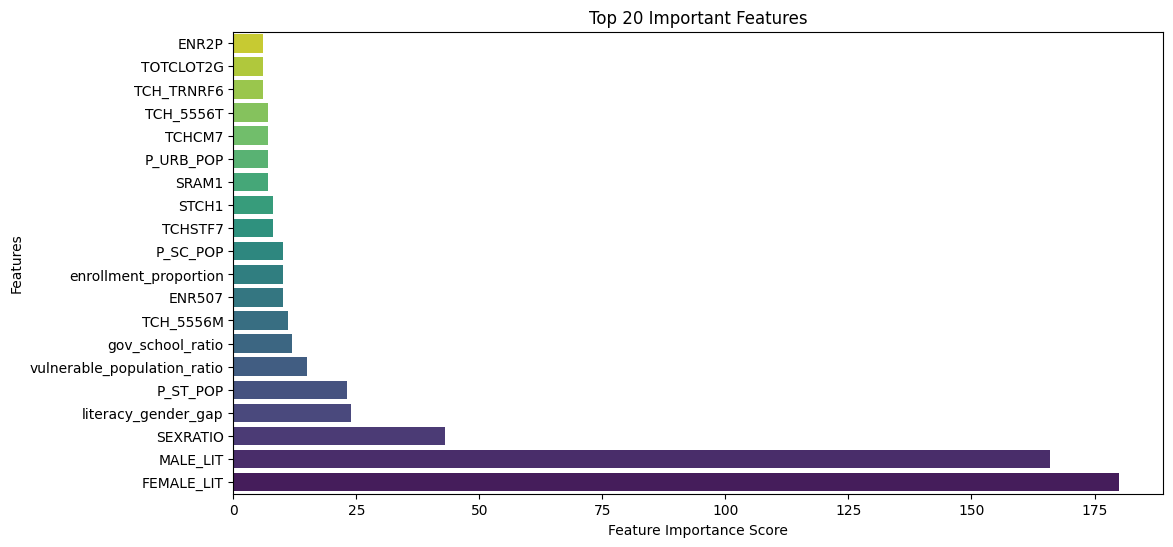

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance
feature_importance = lgb_model.feature_importances_
feature_names = X_train.columns

# Create DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display top 20 important features
print("\nTop 20 Most Important Features:")
print(importance_df.head(20))

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x=importance_df['Importance'][:20], y=importance_df['Feature'][:20], palette='viridis')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Top 20 Important Features')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()


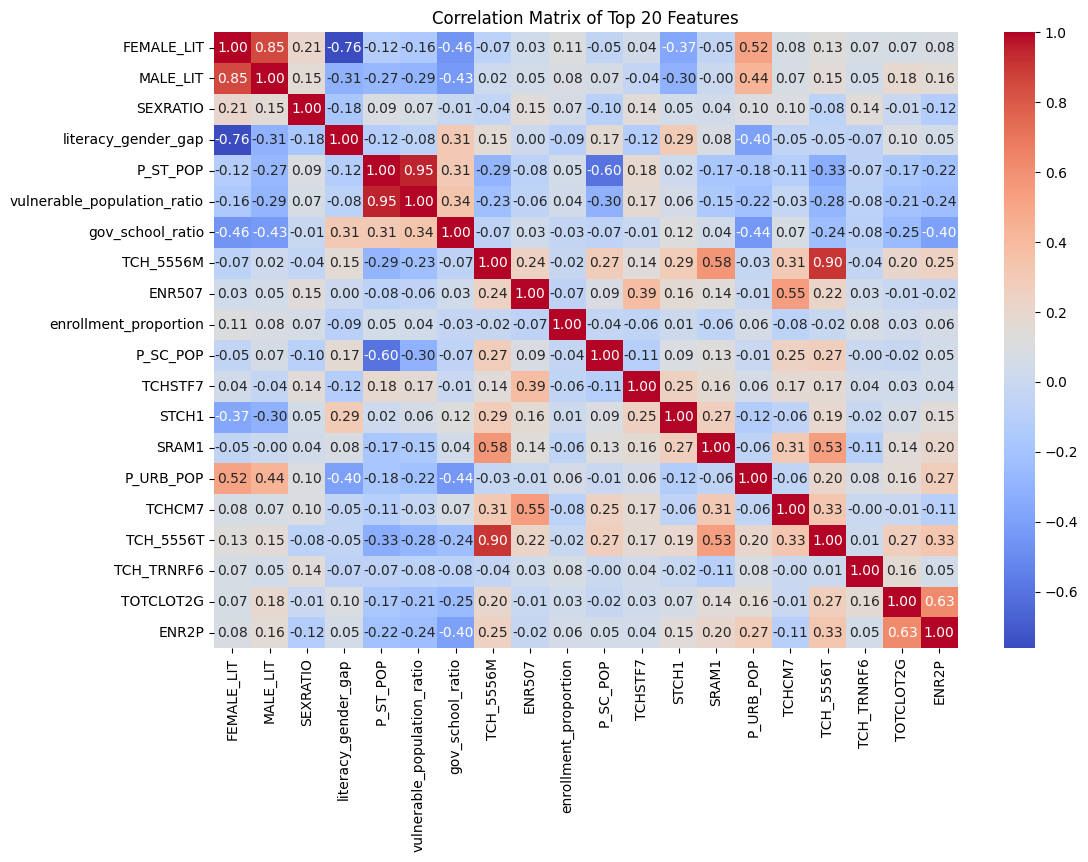

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(X_train[importance_df['Feature'][:20]].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Top 20 Features")
plt.show()


Overall dropout rate median: 0.49003972815023217
Value counts for dropout_class:
dropout_class
1    340
0    340
Name: count, dtype: int64
Number of features after variance filtering: 819

Classification Report - Train Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       268
           1       1.00      1.00      1.00       276

    accuracy                           1.00       544
   macro avg       1.00      1.00      1.00       544
weighted avg       1.00      1.00      1.00       544

Classification Report - Test Set:
              precision    recall  f1-score   support

           0       0.86      0.78      0.82        72
           1       0.77      0.86      0.81        64

    accuracy                           0.82       136
   macro avg       0.82      0.82      0.82       136
weighted avg       0.82      0.82      0.82       136

Test Accuracy: 0.8161764705882353

Cross-Validation Accuracy Scores: [0.81617647 0.86764

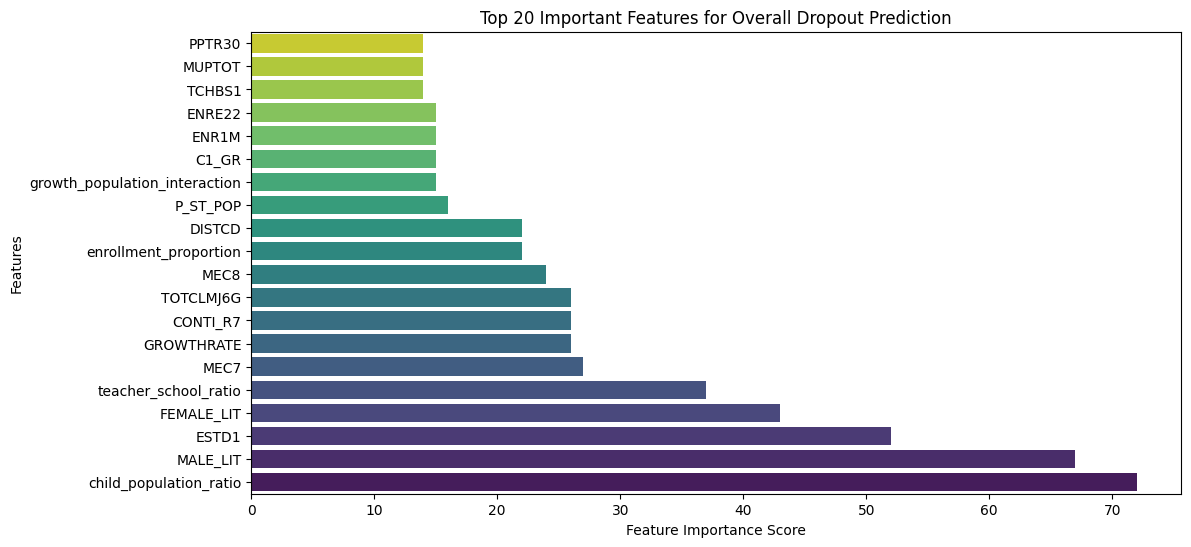

In [74]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_selection import VarianceThreshold
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns



# --- Step 1: Compute Overall Dropout Rate ---
# Using C15A for Primary Enrollment and C68A for Upper Primary Enrollment.
if 'C15A' in df4.columns and 'C68A' in df4.columns:
    df4['overall_dropout_rate'] = np.where(
        df4['C15A'] > 0,
        (df4['C15A'] - df4['C68A']) / df4['C15A'],
        0
    )
else:
    raise ValueError("Columns 'C15A' and/or 'C68A' not found in the dataset.")

# --- Step 2: Create a Binary Target Variable for Dropout Classification ---
# Districts with an overall dropout rate above the median are labeled as 1 (high dropout)
# and those at or below as 0 (low dropout).
median_dropout = df4['overall_dropout_rate'].median()
df4['dropout_class'] = (df4['overall_dropout_rate'] > median_dropout).astype(int)

print("Overall dropout rate median:", median_dropout)
print("Value counts for dropout_class:")
print(df4['dropout_class'].value_counts())

# --- Step 3: Prepare the Feature Set ---
# Exclude columns that are not features, such as IDs, names, or our target variables.
# Adjust the list below as needed.
exclude_cols = ['overall_dropout_rate', 'dropout_class', 'District_ID', 'District_Name', 'AC_YEAR', 'OVERALL_LI']
feature_cols = [col for col in df4.columns if col not in exclude_cols]

# Use only numerical features (assuming most of the 841 columns are numeric)
X = df4[feature_cols]
y = df4['dropout_class']

# Remove features with zero variance
selector = VarianceThreshold(threshold=0.0)
X_filtered = pd.DataFrame(selector.fit_transform(X),
                            columns=X.columns[selector.get_support(indices=True)])

print("Number of features after variance filtering:", X_filtered.shape[1])

# --- Step 4: Split into Train and Test Sets ---
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.2, random_state=42)

# --- Step 5: Train a LightGBM Classifier ---
lgb_classifier = lgb.LGBMClassifier(n_estimators=100, random_state=42, verbosity=-1)
lgb_classifier.fit(X_train, y_train)

# --- Step 6: Evaluate the Model ---
y_train_pred = lgb_classifier.predict(X_train)
y_test_pred = lgb_classifier.predict(X_test)

print("\nClassification Report - Train Set:")
print(classification_report(y_train, y_train_pred))
print("Classification Report - Test Set:")
print(classification_report(y_test, y_test_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

# --- Step 7: K-Fold Cross-Validation ---
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_accuracy = cross_val_score(lgb_classifier, X_filtered, y, cv=kf, scoring='accuracy')
print("\nCross-Validation Accuracy Scores:", cv_accuracy)
print("Mean CV Accuracy: {:.2f}".format(np.mean(cv_accuracy)))

# --- Step 8: Feature Importance ---
feature_importances = lgb_classifier.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_filtered.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("\nTop 20 Most Important Features for Overall Dropout Prediction:")
print(importance_df.head(20))

plt.figure(figsize=(12, 6))
sns.barplot(x=importance_df['Importance'][:20], y=importance_df['Feature'][:20], palette='viridis')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Top 20 Important Features for Overall Dropout Prediction')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()


### Analyzing State Elementary Dataset

In [75]:
state_ele.head()

,AC_YEAR,STATCD,STATNAME,DISTRICTS,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,P_URB_POP,POPULATION_0_6,...,USCR35,NOTCH_ASS,TCHINV,TOTCLS1G,TOTCLS2G,TOTCLS3G,TOTCLS4G,TOTCLS5G,TOTCLS6G,TOTCLS7G
0,2015-16,1,JAMMU & KASHMIR,22,201,7263,1628,12549,20.05,16.01,...,1014,20491,1946,41171,62474,7878,564,495,24326,2001
1,2015-16,2,HIMACHAL PRADESH,12,124,10120,2243,6857,8.69,11.14,...,652,36054,3053,38307,6930,6909,6498,5445,6151,2717
2,2015-16,3,PUNJAB,22,146,13197,1780,27704,29.82,10.62,...,2754,88618,14200,56222,23531,42532,9244,8406,30835,7218
3,2015-16,4,CHANDIGARH,1,20,84,20,1055,97.25,11.18,...,117,1994,218,135,419,2066,0,36,1398,0
4,2015-16,5,UTTARAKHAND,13,95,11989,995,10117,21.54,13.14,...,1147,12608,1024,48215,14587,7545,12388,6671,1855,3227


In [ ]:
### Understanding Whether Basic Amentities such as Schools with Computers,working kitchens etc affect target variable

In [76]:
features = state_ele[['STATNAME','ROADTOT','SPLAYTOT','SBNDRTOT','SGTOILTOT','SBTOILTOT','SWATTOT'
,'SELETOT','SCOMPTOT','SRAMTOT','SRAMNTOT','MDMTOT','KITTOT','KITSTOT','OVERALL_LI','FEMALE_LIT',
                     'MALE_LIT']].copy()


features.head()

,STATNAME,ROADTOT,SPLAYTOT,SBNDRTOT,SGTOILTOT,SBTOILTOT,SWATTOT,SELETOT,SCOMPTOT,SRAMTOT,SRAMNTOT,MDMTOT,KITTOT,KITSTOT,OVERALL_LI,FEMALE_LIT,MALE_LIT
0,JAMMU & KASHMIR,22634,10604,9710,26934,25887,26362,8078,4916,3746,5956,23201,15074,21674,68.74,58.01,78.26
1,HIMACHAL PRADESH,14929,15456,12016,17949,17898,17999,16401,4680,10157,11421,15331,14268,15117,83.78,76.60,90.83
2,PUNJAB,28650,27853,28317,28482,28216,28771,28757,15136,4791,5490,19901,18042,18565,76.68,71.34,81.48
3,CHANDIGARH,201,187,201,200,198,201,201,190,94,106,116,7,7,86.43,81.38,90.54
4,UTTARAKHAND,18214,13768,19105,22866,22726,22836,16514,7910,4388,5190,17737,15644,17700,79.63,70.70,88.33


In [77]:
grouped_features = features.groupby('STATNAME').sum().reset_index()
grouped_features.head()

,STATNAME,ROADTOT,SPLAYTOT,SBNDRTOT,SGTOILTOT,SBTOILTOT,SWATTOT,SELETOT,SCOMPTOT,SRAMTOT,SRAMNTOT,MDMTOT,KITTOT,KITSTOT,OVERALL_LI,FEMALE_LIT,MALE_LIT
0,A & N ISLANDS,353,238,278,410,409,410,359,232,87,168,333,97,138,86.27,81.84,90.11
1,ANDHRA PRADESH,56961,33051,36954,59873,59222,57562,55922,17785,13498,20081,45561,20650,35387,67.66,59.74,75.56
2,ARUNACHAL PRADESH,2646,1564,2108,3867,3750,3264,1388,963,645,778,3259,2061,3150,66.95,59.57,73.69
3,ASSAM,54335,37171,18742,55372,53929,56568,12850,5731,25504,27968,53184,35980,51698,73.18,67.27,78.81
4,BIHAR,69162,28295,42122,71956,71000,75544,27963,6085,18071,20841,69140,41196,65928,63.82,53.33,73.39


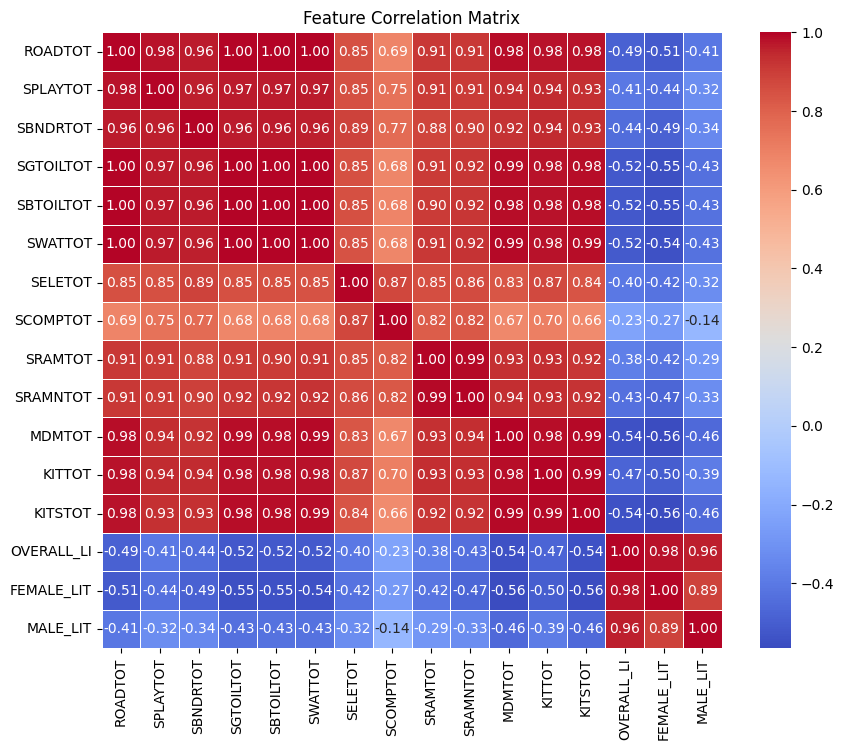

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop categorical column
corr_matrix = features.drop(columns=['STATNAME']).corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()


In [79]:
print(corr_matrix)

             ROADTOT  SPLAYTOT  SBNDRTOT  SGTOILTOT  SBTOILTOT   SWATTOT  \
ROADTOT     1.000000  0.975678  0.963774   0.995591   0.995719  0.996346   
SPLAYTOT    0.975678  1.000000  0.959774   0.967145   0.968697  0.966769   
SBNDRTOT    0.963774  0.959774  1.000000   0.963957   0.964434  0.961662   
SGTOILTOT   0.995591  0.967145  0.963957   1.000000   0.999954  0.999608   
SBTOILTOT   0.995719  0.968697  0.964434   0.999954   1.000000  0.999516   
SWATTOT     0.996346  0.966769  0.961662   0.999608   0.999516  1.000000   
SELETOT     0.852548  0.847449  0.887236   0.848307   0.849203  0.846967   
SCOMPTOT    0.687220  0.745958  0.770177   0.680801   0.682172  0.681048   
SRAMTOT     0.908489  0.906202  0.877781   0.905050   0.904690  0.909958   
SRAMNTOT    0.914371  0.907229  0.895872   0.919248   0.918761  0.922093   
MDMTOT      0.981946  0.938692  0.922526   0.985410   0.984818  0.988278   
KITTOT      0.976520  0.944455  0.941788   0.979384   0.978972  0.981310   
KITSTOT     

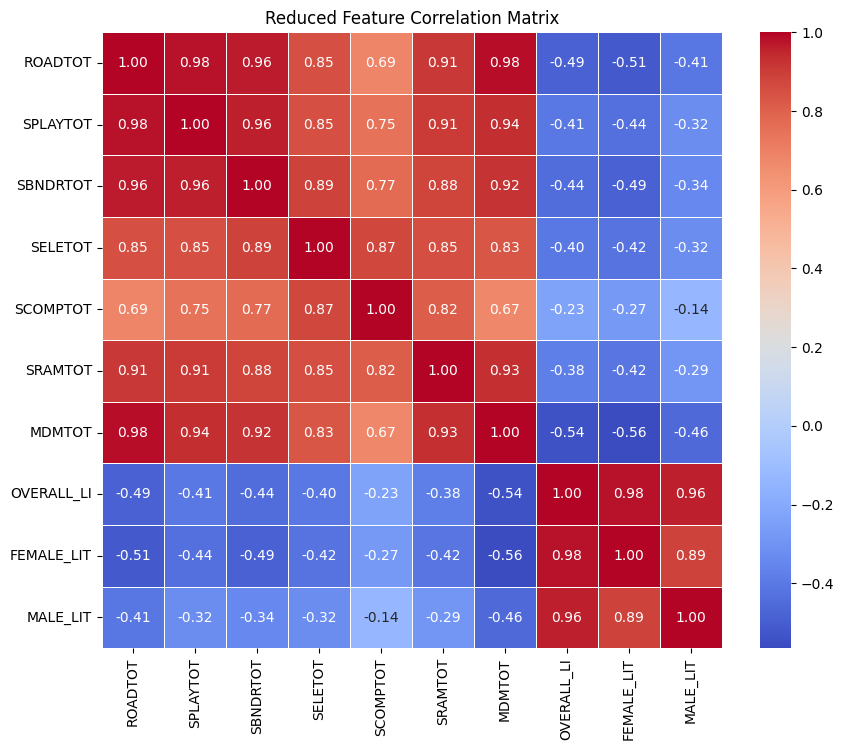

In [80]:
# Dropping highly correlated redundant features
features_filtered = features.drop(columns=['SGTOILTOT', 'SBTOILTOT', 'SWATTOT', 
                                           'SRAMNTOT', 'KITTOT', 'KITSTOT'])

# Checking new correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(features_filtered.drop(columns=['STATNAME']).corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Reduced Feature Correlation Matrix")
plt.show()


In [81]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd

# Select features and target
X = features_filtered.drop(columns=['STATNAME', 'OVERALL_LI'])  # Features
y = features_filtered['OVERALL_LI']  # Target variable

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize and train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
# Predict on the test set
y_pred = rf.predict(X_test)

# Evaluate the R² score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")


R² Score: 0.9335


Random Forest R² Score: 0.9335
XGBoost R² Score: 0.9078
LightGBM R² Score: -0.0787


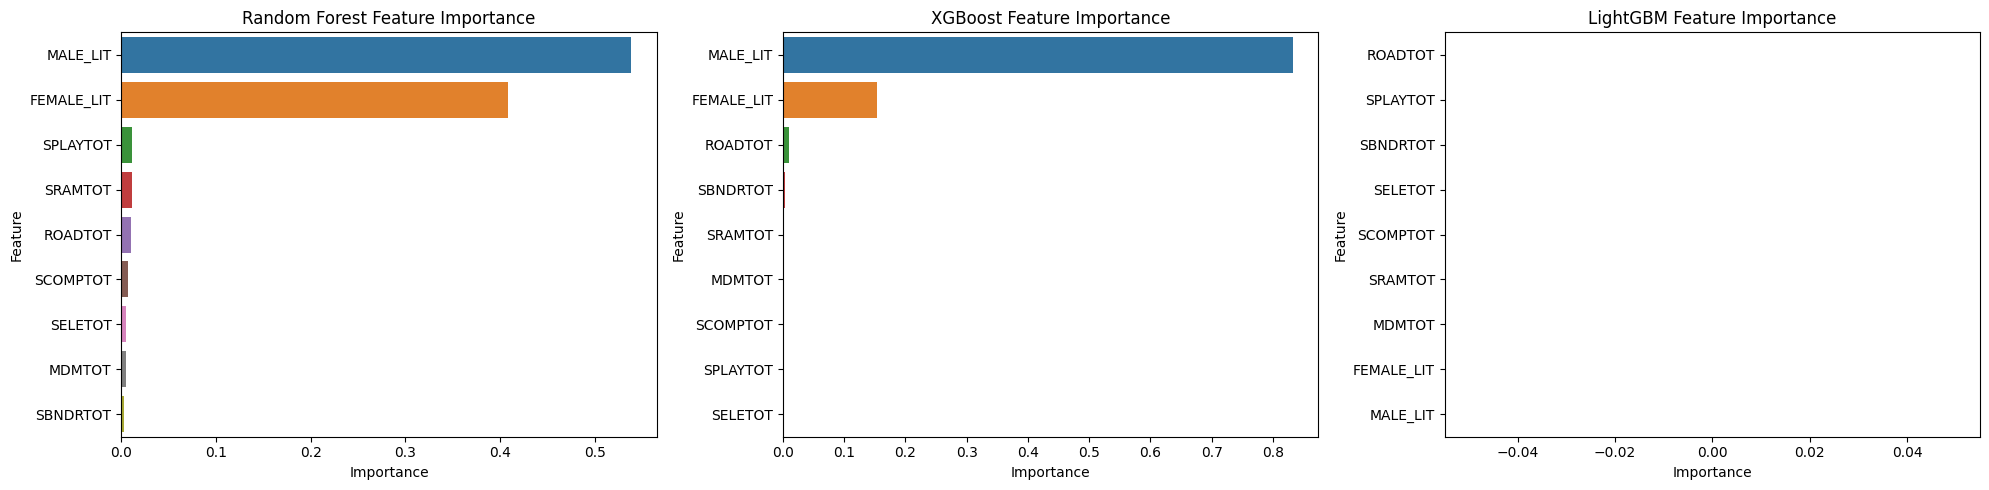

In [82]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Import models
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb

# Assuming features_filtered is the dataframe with the reduced features
X = features_filtered.drop(columns=['STATNAME', 'OVERALL_LI'])  # Features
y = features_filtered['OVERALL_LI']  # Target variable

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
rf = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
lgb_model = lgb.LGBMRegressor(n_estimators=100, random_state=42)

# Train Random Forest
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_r2 = r2_score(y_test, rf_pred)
rf_importance = rf.feature_importances_

# Train XGBoost
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_r2 = r2_score(y_test, xgb_pred)
xgb_importance = xgb_model.feature_importances_

# Train LightGBM
lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_test)
lgb_r2 = r2_score(y_test, lgb_pred)
lgb_importance = lgb_model.feature_importances_

# Display R² Scores
print(f"Random Forest R² Score: {rf_r2:.4f}")
print(f"XGBoost R² Score: {xgb_r2:.4f}")
print(f"LightGBM R² Score: {lgb_r2:.4f}")

# Feature Importances - Random Forest
rf_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': rf_importance})
rf_importance_df = rf_importance_df.sort_values(by='Importance', ascending=False)

# Feature Importances - XGBoost
xgb_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': xgb_importance})
xgb_importance_df = xgb_importance_df.sort_values(by='Importance', ascending=False)

# Feature Importances - LightGBM
lgb_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': lgb_importance})
lgb_importance_df = lgb_importance_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importances
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Random Forest
sns.barplot(x='Importance', y='Feature', data=rf_importance_df, ax=axes[0])
axes[0].set_title("Random Forest Feature Importance")

# XGBoost
sns.barplot(x='Importance', y='Feature', data=xgb_importance_df, ax=axes[1])
axes[1].set_title("XGBoost Feature Importance")

# LightGBM
sns.barplot(x='Importance', y='Feature', data=lgb_importance_df, ax=axes[2])
axes[2].set_title("LightGBM Feature Importance")

plt.tight_layout()
plt.show()


In [83]:
state_ele.shape

(36, 816)

In [84]:
kerala_data = state_ele[state_ele['STATNAME'] == 'KERELA']
bihar_data = state_ele[state_ele['STATNAME'] == 'BIHAR']


In [85]:
state_ele.head(36)

,AC_YEAR,STATCD,STATNAME,DISTRICTS,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,P_URB_POP,POPULATION_0_6,...,USCR35,NOTCH_ASS,TCHINV,TOTCLS1G,TOTCLS2G,TOTCLS3G,TOTCLS4G,TOTCLS5G,TOTCLS6G,TOTCLS7G
0,2015-16,1,JAMMU & KASHMIR,22,201,7263,1628,12549,20.05,16.01,...,1014,20491,1946,41171,62474,7878,564,495,24326,2001
1,2015-16,2,HIMACHAL PRADESH,12,124,10120,2243,6857,8.69,11.14,...,652,36054,3053,38307,6930,6909,6498,5445,6151,2717
2,2015-16,3,PUNJAB,22,146,13197,1780,27704,29.82,10.62,...,2754,88618,14200,56222,23531,42532,9244,8406,30835,7218
3,2015-16,4,CHANDIGARH,1,20,84,20,1055,97.25,11.18,...,117,1994,218,135,419,2066,0,36,1398,0
4,2015-16,5,UTTARAKHAND,13,95,11989,995,10117,21.54,13.14,...,1147,12608,1024,48215,14587,7545,12388,6671,1855,3227
5,2015-16,6,HARYANA,21,126,7438,1523,25353,24.12,13.01,...,2485,36544,5420,52975,23273,35337,8686,10503,20136,6481
6,2015-16,7,DELHI,9,69,1201,69,16753,77.03,11.76,...,1818,342025,16445,31334,10627,26042,287,5952,3943,1074
7,2015-16,8,RAJASTHAN,33,302,41441,10594,68621,19.26,15.31,...,11705,40162,2701,125798,253514,120330,979,5189,86126,1720
8,2015-16,9,UTTAR PRADESH,75,971,98470,9423,199581,17.31,14.90,...,25145,43645,6994,746590,99397,24849,297150,42320,6679,12482
9,2015-16,10,BIHAR,38,537,40779,5633,103805,8.36,17.90,...,26429,49110,3614,147323,272919,11332,2481,475,23095,927


In [86]:
kerala_data = kerala_data.dropna(subset=['FEMALE_LIT'])
bihar_data = bihar_data.dropna(subset=['FEMALE_LIT'])


In [87]:
kerala_data[['OVERALL_LI', 'FEMALE_LIT', 'MALE_LIT']].describe()

invalid value encountered in greater
invalid value encountered in less
invalid value encountered in greater


,OVERALL_LI,FEMALE_LIT,MALE_LIT
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


In [88]:
bihar_data[['OVERALL_LI', 'FEMALE_LIT', 'MALE_LIT']].describe()

invalid value encountered in greater
invalid value encountered in less
invalid value encountered in greater


,OVERALL_LI,FEMALE_LIT,MALE_LIT
count,1.00,1.00,1.00
mean,63.82,53.33,73.39
std,NaN,NaN,NaN
min,63.82,53.33,73.39
25%,63.82,53.33,73.39
50%,63.82,53.33,73.39
75%,63.82,53.33,73.39
max,63.82,53.33,73.39


In [89]:
kerala_corr = kerala_data[['OVERALL_LI', 'FEMALE_LIT', 'MALE_LIT']].corr()
bihar_corr = bihar_data[['OVERALL_LI', 'FEMALE_LIT', 'MALE_LIT']].corr()


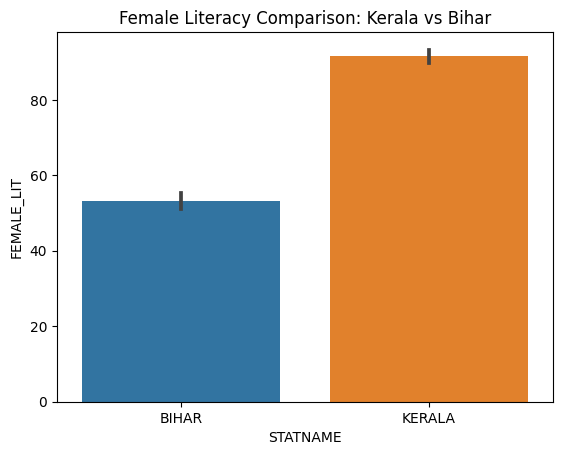

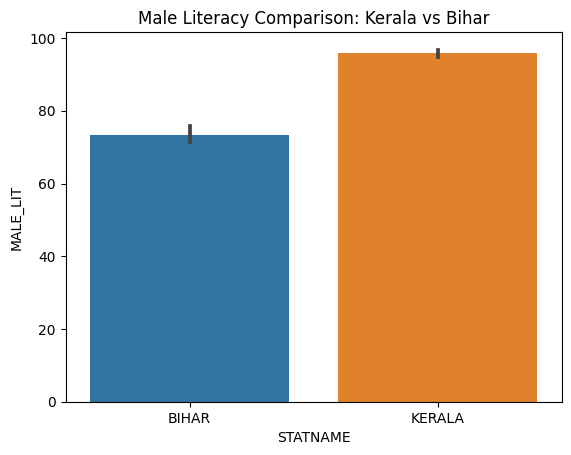

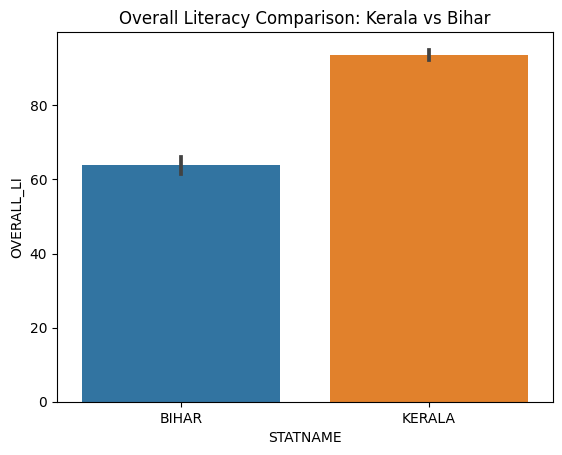

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt




### Question based on dataset description

# Plotting male and female literacy comparison for Kerala and Bihar
sns.barplot(x='STATNAME', y='FEMALE_LIT', data=dist[dist['STATNAME'].isin(['KERALA', 'BIHAR'])])
plt.title('Female Literacy Comparison: Kerala vs Bihar')
plt.show()

sns.barplot(x='STATNAME', y='MALE_LIT', data=dist[dist['STATNAME'].isin(['KERALA', 'BIHAR'])])
plt.title('Male Literacy Comparison: Kerala vs Bihar')
plt.show()

# Plotting overall literacy comparison for Kerala and Bihar
sns.barplot(x='STATNAME', y='OVERALL_LI', data=dist[dist['STATNAME'].isin(['KERALA', 'BIHAR'])])
plt.title('Overall Literacy Comparison: Kerala vs Bihar')
plt.show()


In [91]:
from scipy import stats

# T-test for female literacy rates
t_stat, p_value = stats.ttest_ind(kerala_data['FEMALE_LIT'], bihar_data['FEMALE_LIT'])
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: nan, P-value: nan


In [92]:
print(kerala_data['FEMALE_LIT'].isnull().sum())
print(bihar_data['FEMALE_LIT'].isnull().sum())


0
0
